In [123]:
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#switch the years to analyze different years

#data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [126]:
import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = r"C:\Users\estifo\OneDrive\Projects\gamma-capture-project\data"

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2012, 2022):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())

                 0        1        2        3        4  5
0  20120102 020000  1.29324  1.29381  1.29324  1.29332  0
1  20120102 020100  1.29326  1.29345  1.29275  1.29341  0
2  20120102 020200  1.29342  1.29344  1.29341  1.29343  0
3  20120102 020300  1.29342  1.29342  1.29335  1.29336  0
4  20120102 020400  1.29324  1.29347  1.29320  1.29346  0


In [127]:
data.tail()

,0,1,2,3,4,5
3712742,20211231 165400,1.13797,1.13797,1.13774,1.13774,0
3712743,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
3712744,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
3712745,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
3712746,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [128]:
data.shape

(3712747, 6)

In [129]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [130]:
data.tail(4)

,DateTime,Open,High,Low,Close,Volume
3712743,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
3712744,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
3712745,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
3712746,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [131]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [132]:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])

DateTime
2019-10-27 19:00:00    2
2019-10-27 19:01:00    2
2019-10-27 19:02:00    2
2019-10-27 19:03:00    2
2019-10-27 19:04:00    2
                      ..
2021-10-31 19:55:00    2
2021-10-31 19:56:00    2
2021-10-31 19:57:00    2
2021-10-31 19:58:00    2
2021-10-31 19:59:00    2
Name: count, Length: 180, dtype: int64


In [133]:
# 1) Make a boolean mask for every duplicated timestamp (marking all occurrences)
dup_mask = data['DateTime'].duplicated(keep=False)

# 2) Subset and sort so we see each duplicated group in one place
dupe_rows = data.loc[dup_mask].sort_values('DateTime')

print(dupe_rows)


                   DateTime     Open     High      Low    Close  Volume
2904338 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
2904398 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
2904339 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
2904399 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
2904340 2019-10-27 19:02:00  1.10826  1.10826  1.10822  1.10822       0
...                     ...      ...      ...      ...      ...     ...
3648533 2021-10-31 19:57:00  1.15526  1.15526  1.15518  1.15520       0
3648594 2021-10-31 19:58:00  1.15520  1.15545  1.15518  1.15545       0
3648534 2021-10-31 19:58:00  1.15520  1.15545  1.15518  1.15545       0
3648535 2021-10-31 19:59:00  1.15545  1.15555  1.15543  1.15551       0
3648595 2021-10-31 19:59:00  1.15545  1.15555  1.15543  1.15551       0

[360 rows x 6 columns]


In [134]:
data.tail()

,DateTime,Open,High,Low,Close,Volume
3712742,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
3712743,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
3712744,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0
3712745,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0
3712746,2021-12-31 16:58:00,1.13740,1.13740,1.13681,1.13686,0


In [135]:
data.set_index('DateTime', inplace=True)

In [136]:
data

,Open,High,Low,Close,Volume
DateTime,,,,,
2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0
2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0
2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0
2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0
2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0
...,...,...,...,...,...
2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0
2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0
2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0


In [137]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\4214865167.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [138]:
full_range

DatetimeIndex(['2012-01-02 02:00:00', '2012-01-02 02:01:00',
               '2012-01-02 02:02:00', '2012-01-02 02:03:00',
               '2012-01-02 02:04:00', '2012-01-02 02:05:00',
               '2012-01-02 02:06:00', '2012-01-02 02:07:00',
               '2012-01-02 02:08:00', '2012-01-02 02:09:00',
               ...
               '2021-12-31 16:49:00', '2021-12-31 16:50:00',
               '2021-12-31 16:51:00', '2021-12-31 16:52:00',
               '2021-12-31 16:53:00', '2021-12-31 16:54:00',
               '2021-12-31 16:55:00', '2021-12-31 16:56:00',
               '2021-12-31 16:57:00', '2021-12-31 16:58:00'],
              dtype='datetime64[ns]', length=5258339, freq='min')

In [139]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2012-01-02 09:24:00', '2012-01-02 10:41:00',
               '2012-01-02 12:29:00', '2012-01-02 12:32:00',
               '2012-01-02 12:34:00', '2012-01-02 12:36:00',
               '2012-01-02 12:45:00', '2012-01-02 13:08:00',
               '2012-01-02 13:15:00', '2012-01-02 13:16:00',
               ...
               '2021-12-30 23:48:00', '2021-12-31 00:25:00',
               '2021-12-31 00:43:00', '2021-12-31 00:48:00',
               '2021-12-31 00:52:00', '2021-12-31 01:58:00',
               '2021-12-31 02:17:00', '2021-12-31 13:43:00',
               '2021-12-31 14:07:00', '2021-12-31 14:36:00'],
              dtype='datetime64[ns]', length=1545772, freq=None)


In [140]:
data.iloc[35:45]

,Open,High,Low,Close,Volume
DateTime,,,,,
2012-01-02 02:35:00,1.29411,1.29421,1.29409,1.29413,0
2012-01-02 02:36:00,1.29414,1.29421,1.29414,1.29415,0
2012-01-02 02:37:00,1.29424,1.29453,1.29424,1.29447,0
2012-01-02 02:38:00,1.29431,1.29431,1.29391,1.29410,0
2012-01-02 02:39:00,1.29414,1.29430,1.29402,1.29424,0
2012-01-02 02:40:00,1.29426,1.29427,1.29413,1.29424,0
2012-01-02 02:41:00,1.29425,1.29436,1.29424,1.29427,0
2012-01-02 02:42:00,1.29426,1.29447,1.29423,1.29425,0
2012-01-02 02:43:00,1.29428,1.29428,1.29393,1.29396,0


In [141]:
data.iloc[50:60]

,Open,High,Low,Close,Volume
DateTime,,,,,
2012-01-02 02:50:00,1.29418,1.29429,1.29408,1.29419,0
2012-01-02 02:51:00,1.29422,1.29439,1.29422,1.29431,0
2012-01-02 02:52:00,1.29424,1.29439,1.29413,1.29413,0
2012-01-02 02:53:00,1.29414,1.29416,1.29414,1.29414,0
2012-01-02 02:54:00,1.29412,1.29415,1.29412,1.29414,0
2012-01-02 02:55:00,1.29413,1.29413,1.29402,1.29404,0
2012-01-02 02:56:00,1.29402,1.29419,1.29396,1.29416,0
2012-01-02 02:57:00,1.29412,1.29420,1.29407,1.29411,0
2012-01-02 02:58:00,1.29410,1.29410,1.29409,1.29409,0


In [142]:
missing_timestamps.shape   # All missing timestamps (including weekends)

(1545772,)

In [143]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [144]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2012-01-02 09:24:00,1
1,2012-01-02 10:41:00,1
2,2012-01-02 12:29:00,1
3,2012-01-02 12:32:00,1
4,2012-01-02 12:34:00,1
...,...,...
1545767,2021-12-31 01:58:00,1
1545768,2021-12-31 02:17:00,1
1545769,2021-12-31 13:43:00,1
1545770,2021-12-31 14:07:00,1


In [145]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [146]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [147]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [148]:
combined_df

,DateTime,Open,High,Low,Close,Volume,indicator
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,NaN
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,NaN
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,NaN
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,NaN
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,NaN
...,...,...,...,...,...,...,...
5258514,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,NaN
5258515,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,NaN
5258516,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,NaN
5258517,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,NaN


In [149]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [150]:
combined_df.shape

(5258519, 7)

In [151]:
#######    EXPLANATORY DATA ANALYSIS   #######

In [152]:
'''
####   DUPLICATED DATA ANALYSIS  #####
# plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
'''

"\n####   DUPLICATED DATA ANALYSIS  #####\n# plt.figure(figsize=(22, 5))\nplt.bar(dup_per_day.index, dup_per_day.values, color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n\n\n# Plot duplicate occurrences per day\nplt.figure(figsize=(22, 5))\ndup_per_day.plot(kind='bar', color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n"

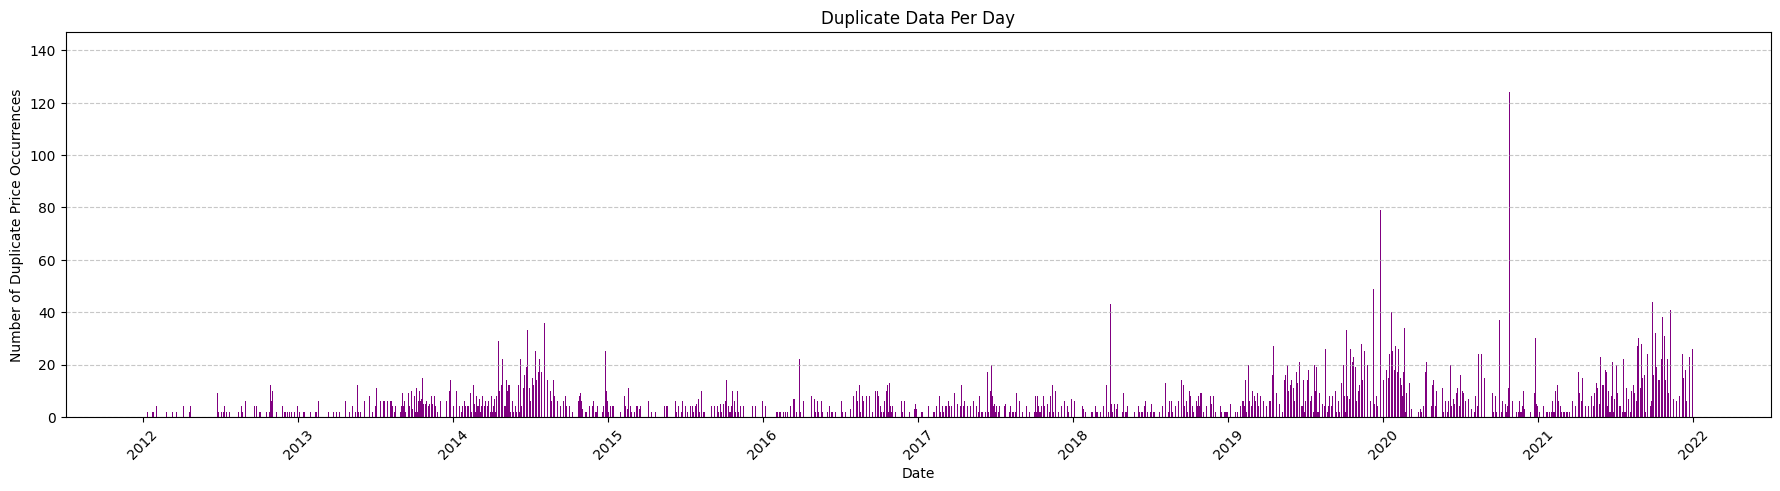

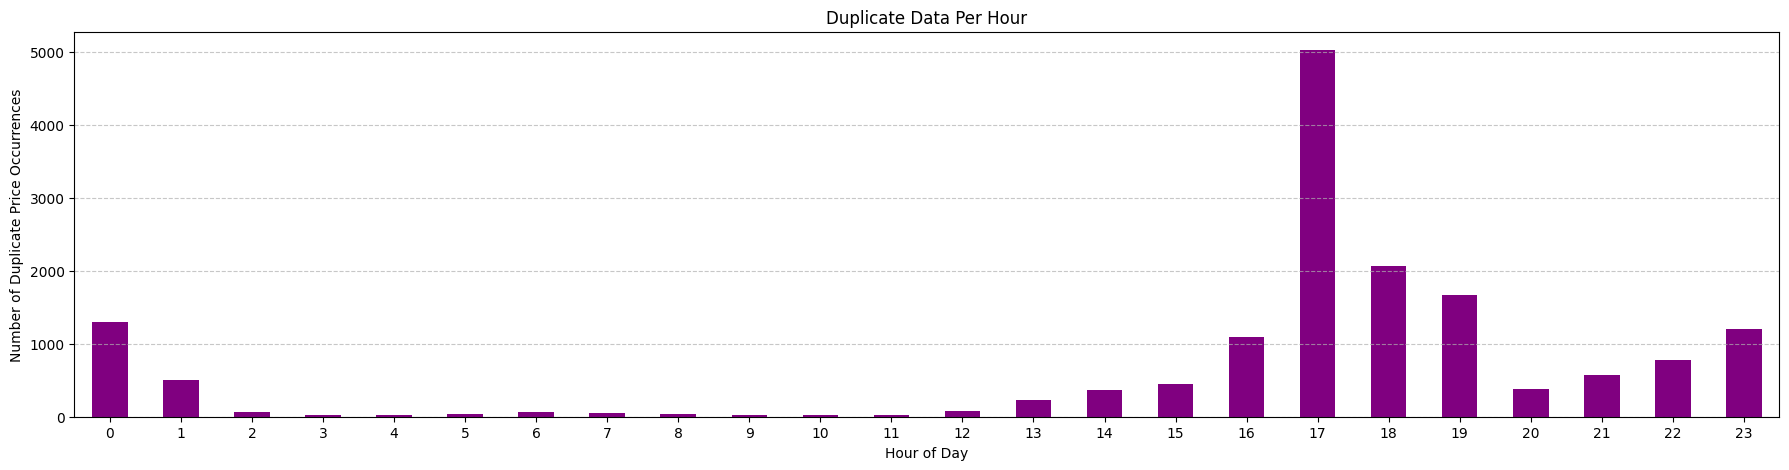

In [153]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# 
plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

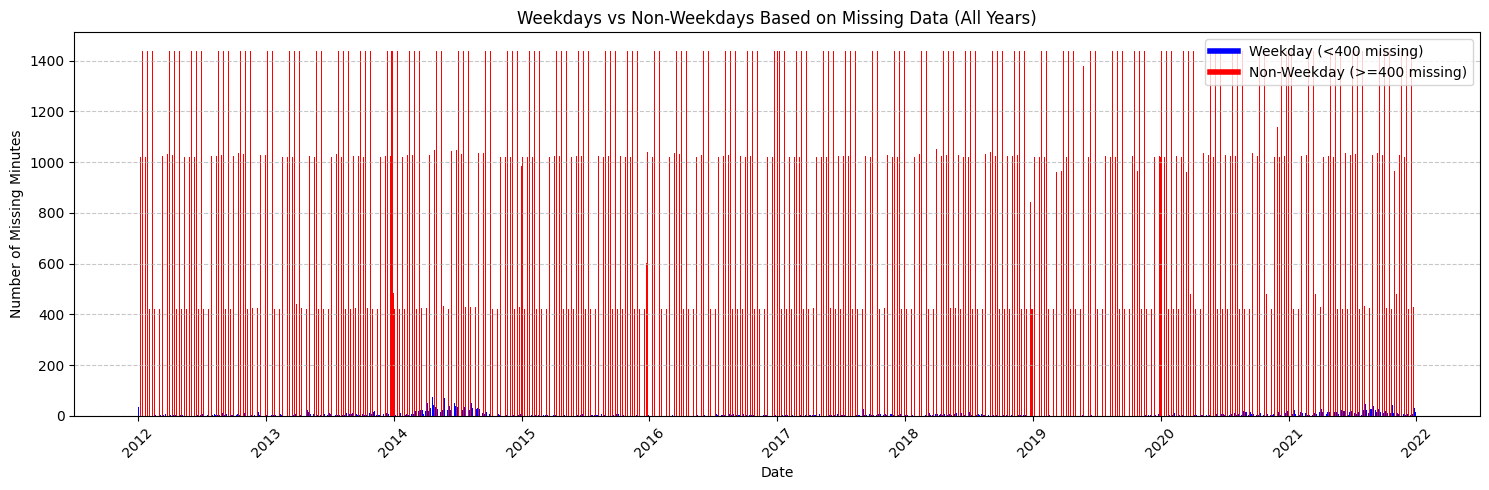

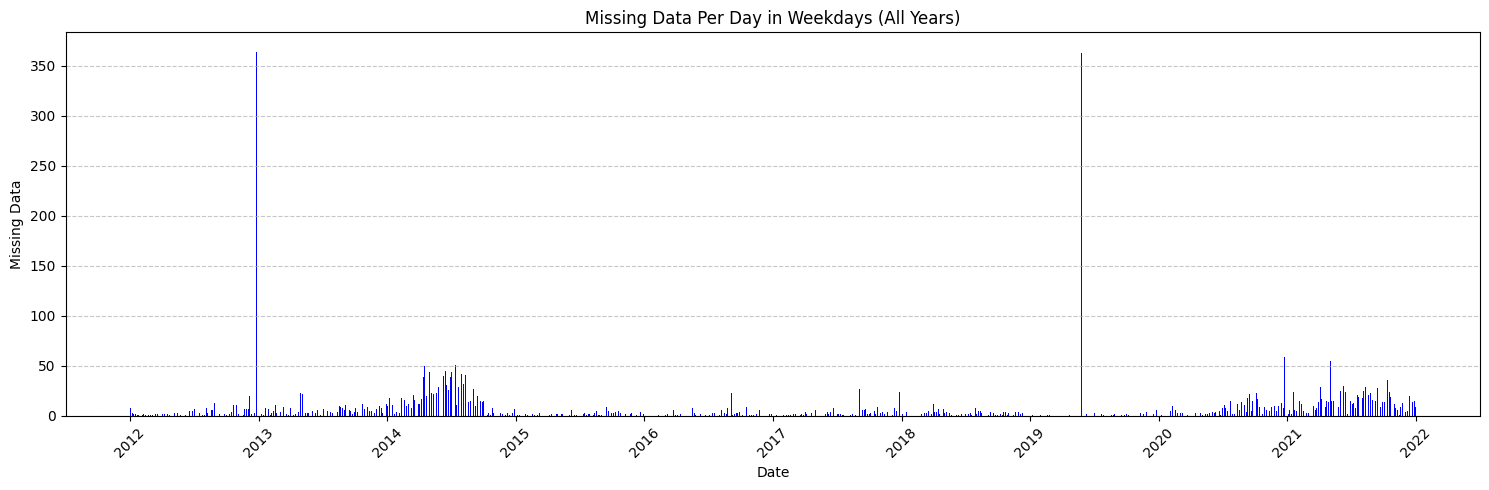

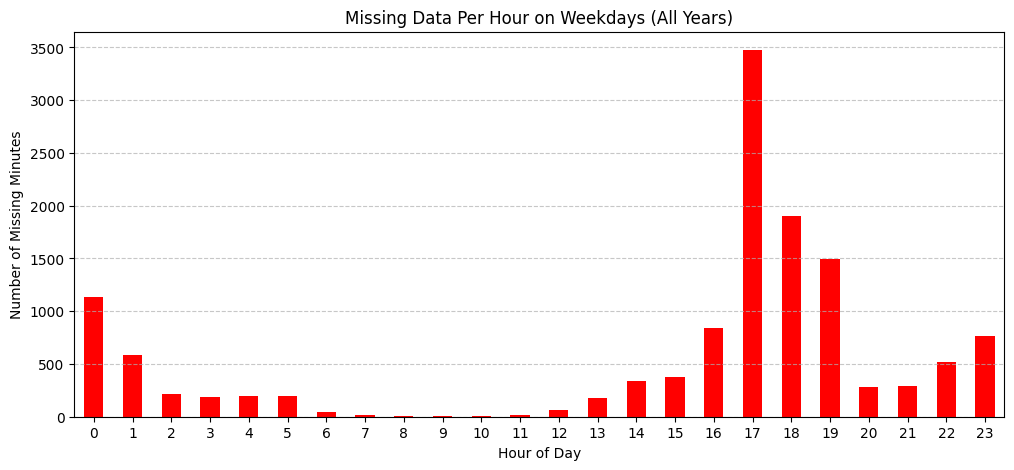

In [154]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index       

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

plt.figure(figsize=(15, 5))
colors = ['blue' if date in weekdays else 'red' for date in missing_per_day.index]
plt.bar(missing_per_day.index, missing_per_day.values, color=colors)

plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Weekday (<400 missing)')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Non-Weekday (>=400 missing)')
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()
plt.show()


weekday_missing_data = missing_per_day[weekdays]
plt.figure(figsize=(15, 5))
plt.bar(weekday_missing_data.index, weekday_missing_data.values, color='blue')

plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [155]:
missing_per_day

DateTime
2012-01-02     34
2012-01-03      8
2012-01-04      0
2012-01-05      1
2012-01-06    421
             ... 
2021-12-27     30
2021-12-28     15
2021-12-29     18
2021-12-30     17
2021-12-31      9
Name: indicator, Length: 3652, dtype: int64

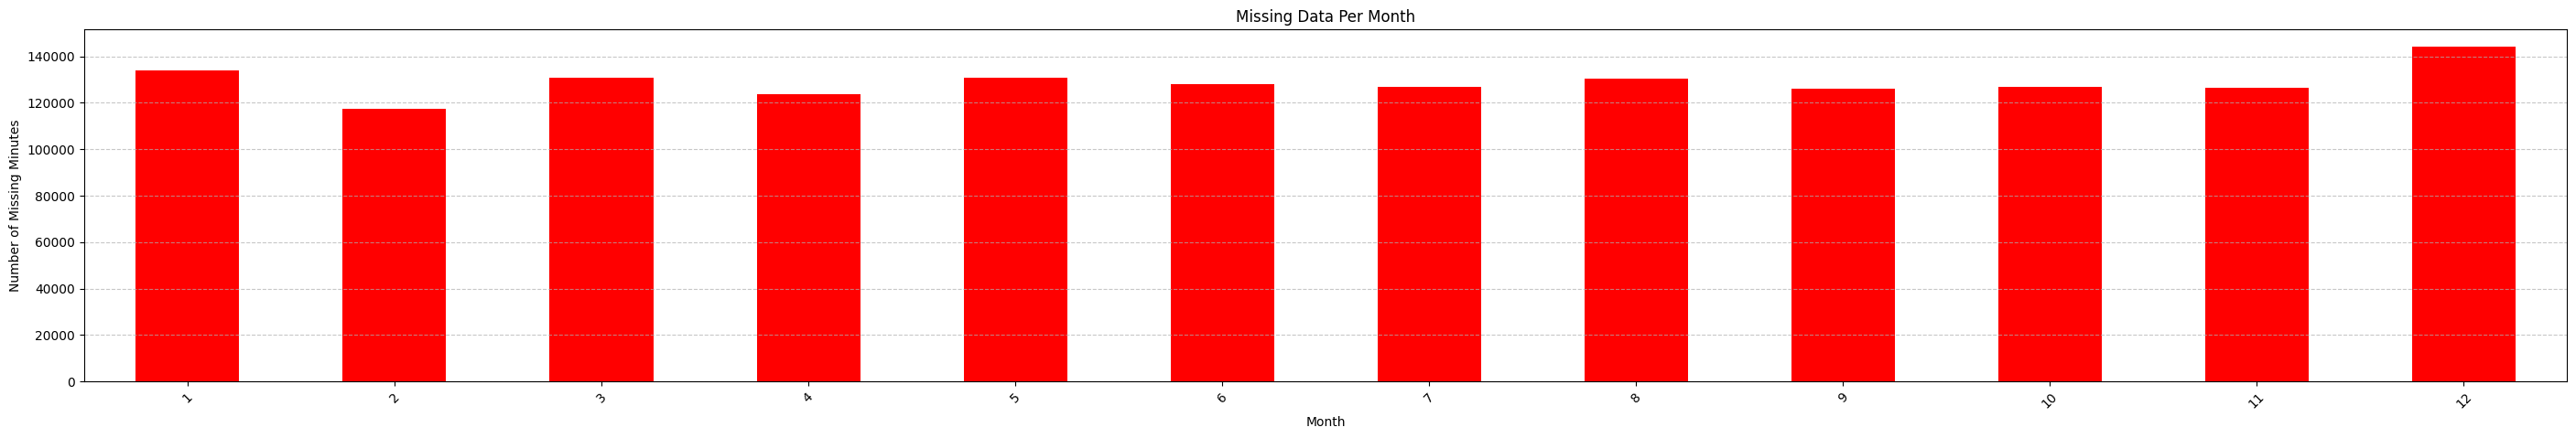

In [156]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [157]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [158]:
print(missing_per_month)

DateTime
1     133889
2     117307
3     130743
4     123789
5     130668
6     128124
7     127025
8     130626
9     126070
10    126858
11    126306
12    144367
Name: indicator, dtype: int64


In [159]:
sum(missing_per_month)-(11520*12)

1407532

In [160]:
def remove_all_consecutive_duplicates(df):
    """Remove consecutive OHLC duplicates and flat bars with no price movement"""
    df_clean = df.copy()
    
    while True:
        # Check for consecutive duplicates
        prev_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(1)) & 
            (df_clean['High'] == df_clean['High'].shift(1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(1))
        )
        
        next_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(-1)) & 
            (df_clean['High'] == df_clean['High'].shift(-1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(-1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(-1))
        )
        
        # Check for flat bars (no price movement)
        flat_bar = (
            (df_clean['Open'] == df_clean['High']) & 
            (df_clean['Open'] == df_clean['Low']) & 
            (df_clean['Open'] == df_clean['Close'])
        )
        
        # Combine conditions
        is_duplicate = prev_dup | next_dup | flat_bar
        count = is_duplicate.sum()
        
        if count == 0:
            break
            
        print(f"Marking {count} duplicates and flat bars…")

        # 1) blank out the OHLC
        df_clean.loc[is_duplicate, ['Open','High','Low','Close']] = np.nan
        df_clean.loc[is_duplicate, 'Volume'] = 0
        # 2) flag them
        df_clean.loc[is_duplicate, 'indicator'] = 1
        
    
    
    return df_clean

def remove_duplicate_timestamps(df):
    """
    Remove rows so that every DateTime is unique.
    Keeps the first occurrence of each timestamp and deletes all others.
    """
    df_clean = df.copy()

    while True:
        # Mark all rows whose DateTime appears more than once
        dup_mask = df_clean['DateTime'].duplicated(keep=False)
        if not dup_mask.any():
            break

        # Of those duplicates, keep only the first in each group
        to_remove = df_clean['DateTime'].duplicated(keep='first')
        count = to_remove.sum()
        print(f"Removing {count} rows with duplicate timestamps…")

        df_clean = df_clean.loc[~to_remove].reset_index(drop=True)

    return df_clean

def process_duplicated_data(df):
    """
    Process the DataFrame to remove duplicate timestamps and consecutive duplicates.
    """
    # Remove duplicate timestamps
    df = remove_duplicate_timestamps(df)

    # Remove consecutive duplicates and flat bars
    df = remove_all_consecutive_duplicates(df)

    return df


In [161]:
final_data_clean = process_duplicated_data(combined_df)

Removing 180 rows with duplicate timestamps…
Marking 57130 duplicates and flat bars…


In [162]:
def check_dup(data):
    # Check for consecutive duplicates with previous row
    verify_prev = (
        (data['Open'] == data['Open'].shift(1)) & 
        (data['High'] == data['High'].shift(1)) & 
        (data['Low'] == data['Low'].shift(1)) & 
        (data['Close'] == data['Close'].shift(1))
    )
    
    # Check for consecutive duplicates with next row
    verify_next = (
        (data['Open'] == data['Open'].shift(-1)) & 
        (data['High'] == data['High'].shift(-1)) & 
        (data['Low'] == data['Low'].shift(-1)) & 
        (data['Close'] == data['Close'].shift(-1))
    )
    
    # Check for flat bars (no price movement)
    flat_bar = (
        (data['Open'] == data['High']) & 
        (data['Open'] == data['Low']) & 
        (data['Open'] == data['Close'])
    )
    
    # Count each type of duplicate
    consecutive_dups = (verify_prev | verify_next).sum()
    flat_bars = flat_bar.sum()
    total_dups = (verify_prev | verify_next | flat_bar).sum()
    
    print(f"Consecutive duplicates: {consecutive_dups}")
    print(f"Flat bars (no price movement): {flat_bars}")
    print(f"Total issues: {total_dups}")
    
    return total_dups

In [163]:
check_dup(final_data_clean)

Consecutive duplicates: 0
Flat bars (no price movement): 0
Total issues: 0


np.int64(0)

In [164]:
final_data_clean

,DateTime,Open,High,Low,Close,Volume,indicator
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,0
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,0
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,0
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,0
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,0
...,...,...,...,...,...,...,...
5258334,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
5258335,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
5258336,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
5258337,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [165]:
final_data = final_data_clean.copy()
# Ensure 'DateTime' is the index
#final_data.index = pd.to_datetime(final_data.index)

<Axes: >

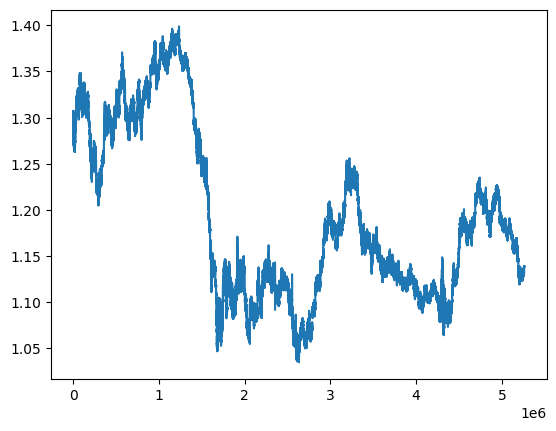

In [166]:
final_data['Close'].plot()    ### plot data nicely including years

In [167]:
final_data

,DateTime,Open,High,Low,Close,Volume,indicator
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,0
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,0
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,0
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,0
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,0
...,...,...,...,...,...,...,...
5258334,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0
5258335,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0
5258336,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0
5258337,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0


In [168]:
data = final_data.copy()

In [169]:
data['Close'].iloc[374920:374950].max()

np.float64(1.30672)

In [170]:
data['Close'].nlargest(n=5)

1234478    1.39897
1234477    1.39886
1234486    1.39874
1234485    1.39860
1234479    1.39837
Name: Close, dtype: float64

In [171]:
max_idx = data['Close'].idxmax()
max_idx

1234478

In [172]:
data.loc[max_idx, :] = np.nan

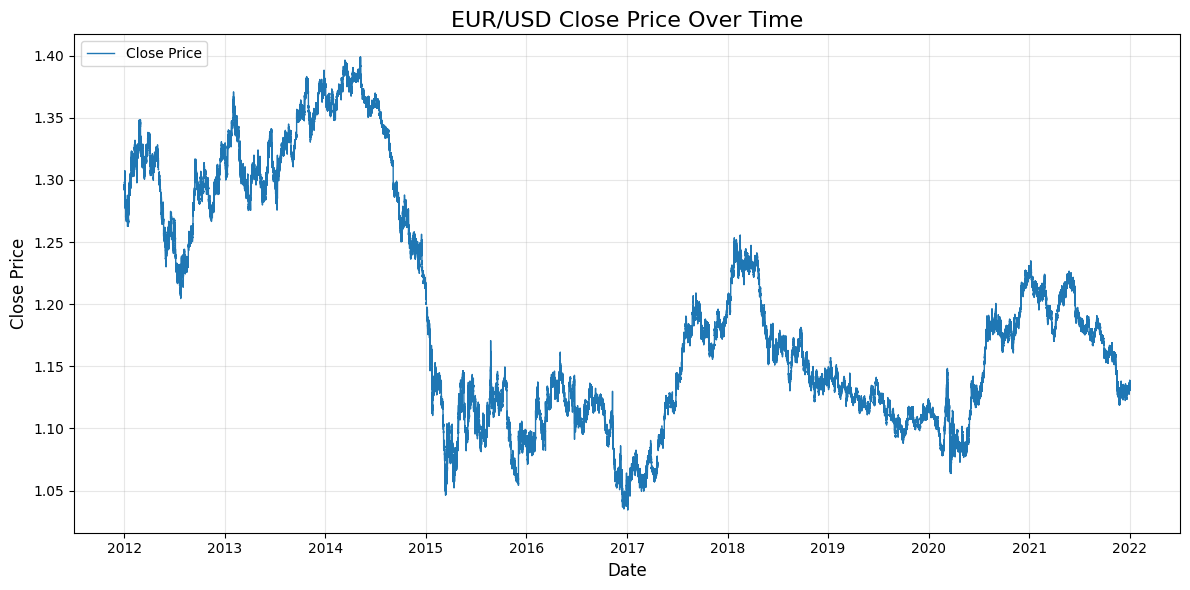

In [173]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [174]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,0.0,2.0
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,0.0,2.0
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,0.0,2.0
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,0.0,2.0
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
5258334,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0.0,16.0
5258335,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0.0,16.0
5258336,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0.0,16.0
5258337,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0.0,16.0


In [175]:
#data.reset_index(inplace=True)

In [176]:
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,0.0,2.0
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,0.0,2.0
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,0.0,2.0
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,0.0,2.0
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
5258334,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0.0,16.0
5258335,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0.0,16.0
5258336,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0.0,16.0
5258337,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0.0,16.0


In [177]:
#data.drop(columns=['index'], inplace=True)

In [178]:
data.head(20)

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,0.0,2.0
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,0.0,2.0
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,0.0,2.0
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,0.0,2.0
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,0.0,2.0
5,2012-01-02 02:05:00,1.29354,1.29415,1.29354,1.29392,0.0,0.0,2.0
6,2012-01-02 02:06:00,1.29393,1.29442,1.29391,1.29430,0.0,0.0,2.0
7,2012-01-02 02:07:00,1.29429,1.29429,1.29395,1.29395,0.0,0.0,2.0
8,2012-01-02 02:08:00,1.29396,1.29408,1.29395,1.29407,0.0,0.0,2.0
9,2012-01-02 02:09:00,1.29406,1.29434,1.29401,1.29420,0.0,0.0,2.0


In [179]:
# Count how many times each timestamp appears:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])


Series([], Name: count, dtype: int64)


In [180]:
########################################################################
########################################################################
#############   SPY 15 VOL TEST DATASET   ##############################

In [181]:
df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
df['mid'] = (df['bid '] + df['ask'])/2

# 1. Make sure your time column is datetime and floor it to the minute
df['time'] = pd.to_datetime(df['time'])
df['minute'] = df['time'].dt.floor('T')

# 2. Assign group_id by “which minute‐bin” each row belongs to
df['group_id'] = df.groupby('minute').ngroup()

# 3. Now compute the OHLC on mid for each group_id
mid_ohlc = (
    df
    .groupby('group_id')
    .agg(
        minute = ('minute', 'first'),
        open   = ('mid',    'first'),
        high   = ('mid',    'max'),
        low    = ('mid',    'min'),
        close  = ('mid',    'last')
    )
    .reset_index()
)

# mid_ohlc now has:
#   group_id | minute           | open      | high      | low       | close
#   -------------------------------------------------------------------------
#     0      | 2025-02-19 08:00 | 609.6209  | 609.6287  | 609.6209  | …
#     1      | 2025-02-19 08:01 | 609.4673  | 609.5114  | 609.4503  | …
#     2      | 2025-02-19 08:02 | …         | …         | …         | …



C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\461763248.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\461763248.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])
C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\461763248.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute'] = df['time'].dt.floor('T')


In [182]:
mid_ohlc

,group_id,minute,open,high,low,close
0,0.0,2025-02-19 08:00:00,609.620921,609.718208,609.435313,609.469308
1,1.0,2025-02-19 08:01:00,609.458008,609.531182,609.437541,609.474540
2,2.0,2025-02-19 08:02:00,609.472416,609.530265,609.427305,609.446263
3,3.0,2025-02-19 08:03:00,609.439725,609.490422,609.400389,609.425303
4,4.0,2025-02-19 08:04:00,609.419199,609.421599,609.263119,609.277285
...,...,...,...,...,...,...
776,776.0,2025-02-19 20:56:00,610.653237,610.653237,610.366333,610.403551
777,777.0,2025-02-19 20:57:00,610.403186,610.421814,610.076369,610.155527
778,778.0,2025-02-19 20:58:00,610.156854,610.246400,610.081910,610.179745
779,779.0,2025-02-19 20:59:00,610.174585,610.208648,610.006565,610.129943


In [183]:
# assuming your per-minute OHLC is in mid_ohlc

# 1. Create `indicator` = 1 if any of open/high/low/close is NaN, else 0
mid_ohlc['indicator'] = (
    mid_ohlc[['open','high','low','close']]
    .isnull()
    .any(axis=1)
    .astype(int)
)

# Now mid_ohlc looks like:
#    group_id  minute              open      high       low      close  indicator
# 0         0 2025-02-19 08:00:00  609.6209  609.7182  609.4353  609.4693          0
# 1         1 2025-02-19 08:01:00  609.4580  609.5312  609.4375  609.4745          0
# ...     ...                 ...       ...       ...       ...       ...
# n       781 2025-02-19 21:01:00       NaN       NaN       NaN       NaN          1


In [184]:
mid_ohlc['DateTime'] = pd.to_datetime(mid_ohlc['minute'])

In [185]:
mid_ohlc = mid_ohlc.drop(columns=['minute'])

In [186]:
# Rename the lowercase OHLC columns to Titlecase
mid_ohlc = mid_ohlc.rename(columns={
    'open':  'Open',
    'high':  'High',
    'low':   'Low',
    'close': 'Close'
})

# Add a Volume column, all zeros (same length as mid_ohlc)
mid_ohlc['Volume'] = 0

In [187]:
mid_ohlc

,group_id,Open,High,Low,Close,indicator,DateTime,Volume
0,0.0,609.620921,609.718208,609.435313,609.469308,0,2025-02-19 08:00:00,0
1,1.0,609.458008,609.531182,609.437541,609.474540,0,2025-02-19 08:01:00,0
2,2.0,609.472416,609.530265,609.427305,609.446263,0,2025-02-19 08:02:00,0
3,3.0,609.439725,609.490422,609.400389,609.425303,0,2025-02-19 08:03:00,0
4,4.0,609.419199,609.421599,609.263119,609.277285,0,2025-02-19 08:04:00,0
...,...,...,...,...,...,...,...,...
776,776.0,610.653237,610.653237,610.366333,610.403551,0,2025-02-19 20:56:00,0
777,777.0,610.403186,610.421814,610.076369,610.155527,0,2025-02-19 20:57:00,0
778,778.0,610.156854,610.246400,610.081910,610.179745,0,2025-02-19 20:58:00,0
779,779.0,610.174585,610.208648,610.006565,610.129943,0,2025-02-19 20:59:00,0


In [188]:
mid_ohlc.to_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol_OHLC.csv", index=False)

In [189]:
#########################################################################

In [190]:
data#.iloc[6150:6200]

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,0.0,2.0
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,0.0,2.0
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,0.0,2.0
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,0.0,2.0
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
5258334,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,0.0,16.0
5258335,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,0.0,16.0
5258336,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,0.0,16.0
5258337,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,0.0,16.0


In [191]:
#########################     SAMPLE DATASET GENERATING FUNCTION   #########################

In [192]:
import pandas as pd
import numpy as np

def generate_sample_ohlc(start_datetime: str,
                         periods: int,
                         freq: str = '1T',
                         initial_price: float = 1.12,
                         annual_vol: float = 0.10,
                         missing_rate: float = 0.01) -> pd.DataFrame:
    """
    Generate a synthetic one-minute OHLC price dataset for testing realized-volatility pipelines.
    
    Parameters:
    - start_datetime: ISO string for the first timestamp (e.g., '2020-01-01 00:00:00').
    - periods: Number of 1-minute bars to generate.
    - freq: Frequency string, default '1T' for one-minute bars.
    - initial_price: Starting price for the simulation.
    - annual_vol: Target annualized volatility (e.g., 0.10 for 10%).
    - missing_rate: Fraction of minutes to randomly flag as missing (0 to 1).
    
    Returns:
    - DataFrame with columns ['DateTime','Open','High','Low','Close','Volume','indicator'].
    """
    # Create the datetime index
    idx = pd.date_range(start=start_datetime, periods=periods, freq=freq)
    
    # Convert annual volatility to per-minute volatility (FX: 252 trading days, 24h)
    dt = 1 / (365 * 24 * 60)
    sigma = annual_vol * np.sqrt(dt)
    
    # Simulate log-returns and price series
    returns = np.random.normal(loc=0, scale=sigma, size=periods)
    prices = initial_price * np.exp(np.cumsum(returns))
    
    # Build the OHLC DataFrame
    df = pd.DataFrame(index=idx)
    df['Open'] = prices
    # Add intraminute noise for High/Low/Close
    df['Close'] = prices * np.exp(np.random.normal(0, sigma/2, periods))
    df['High'] = np.maximum(df['Open'], df['Close']) * (1 + np.random.uniform(0, 0.0002, periods))
    df['Low']  = np.minimum(df['Open'], df['Close']) * (1 - np.random.uniform(0, 0.0002, periods))
    df['Volume']    = np.random.poisson(lam=100, size=periods)
    
    # Randomly inject missing rows
    mask = np.random.rand(periods) < missing_rate
    df['indicator'] = mask.astype(int)
    df.loc[mask, ['Open','High','Low','Close','Volume']] = np.nan
    
    # Reset index as DateTime column
    df = df.reset_index().rename(columns={'index':'DateTime'})
    return df


In [193]:
# Example usage:
sample_df = generate_sample_ohlc(start_datetime='2020-01-01 00:00:00',
                                 periods=300000,        
                                 initial_price=1.12,
                                 annual_vol=0.10,
                                 missing_rate=0.15)
sample_df

C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\2445614388.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  idx = pd.date_range(start=start_datetime, periods=periods, freq=freq)


,DateTime,Open,Close,High,Low,Volume,indicator
0,2020-01-01 00:00:00,1.120219,1.120214,1.120221,1.120016,114.0,0
1,2020-01-01 00:01:00,1.120026,1.120100,1.120115,1.119950,98.0,0
2,2020-01-01 00:02:00,1.119953,1.119969,1.120018,1.119791,94.0,0
3,2020-01-01 00:03:00,1.120191,1.120245,1.120282,1.120003,109.0,0
4,2020-01-01 00:04:00,1.120335,1.120200,1.120557,1.120143,105.0,0
...,...,...,...,...,...,...,...
299995,2020-07-27 07:55:00,NaN,NaN,NaN,NaN,NaN,1
299996,2020-07-27 07:56:00,NaN,NaN,NaN,NaN,NaN,1
299997,2020-07-27 07:57:00,NaN,NaN,NaN,NaN,NaN,1
299998,2020-07-27 07:58:00,1.154478,1.154357,1.154622,1.154225,83.0,0


In [194]:
#######   RVOLATILITY CALCULATION   #######

In [195]:
#filter_incomplete_groups(data, timeframe = 120, threshold=0.1, vol_measure='Close-to-Close', minute_interval=1)

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import skew, kurtosis
from matplotlib.ticker import FuncFormatter

"""

Overall, the pipeline is:

1. Drop days with too many missing minutes.

2. Resample to your small minute_interval (e.g. 5 min) to form bars.

3. Compute one per‐bar variance measure 𝑉

4. Sum V and count bars in each large bucket of length timeframe.

5. Turn that sum into an annualized realized volatility.

6. Map it back onto every row, then collapse each bucket to a single row for plotting and statistical analysis.

"""

def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data.reset_index(inplace=True)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    

    data = data.groupby(pd.Grouper(key='DateTime', freq=f'{minute_interval}Min',closed='right',label='right')).agg({
                                          "Open":  "first",
                                          "High":  "max",
                                          "Low":   "min",
                                         "Close": "last",
                                          "Volume": "sum",
                                          "indicator": "sum",
                                          "group_id":  lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan

                                          
                                          })
    return data

def filter_incomplete_groups(ohlc_data, timeframe, threshold, vol_measure, minute_interval):
    """
    Filter out minutes within timeframe groups that exceed missing-data or are undersized.
    Before filtering, plots a scatter of available log-returns per group:
      • Green dots for groups with enough returns (≥ valid_returns_thresh)
      • Red dots for groups with too few returns (< valid_returns_thresh)
    The dashed horizontal line marks valid_returns_thresh.
    """
    # 1) Prepare & index
    ohlc = ohlc_data.copy()
    ohlc['DateTime'] = pd.to_datetime(ohlc['DateTime'], format='%Y%m%d %H%M%S')
    ohlc.set_index('DateTime', inplace=True)
    ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")

    # 2) Compute thresholds
    missing_thresh = timeframe * threshold               # max missing minutes
    valid_returns_thresh = timeframe - missing_thresh    # min log-returns needed

    # 3) Pre-filter metrics
    missing_counts = ohlc.groupby('group_id')['indicator'].sum()
    log_counts     = ohlc.groupby('group_id')['Log_Returns_global'] \
                         .apply(lambda x: x.notna().sum())

    # 4) Scatter plot of log-return counts
    passed = log_counts >= valid_returns_thresh
    plt.figure(figsize=(12, 5))
    plt.scatter(log_counts.index, log_counts.values,
                c=['green' if ok else 'red' for ok in passed],
                edgecolor='k', s=50)
    plt.axhline(y=valid_returns_thresh, color='black',
                linestyle='--', linewidth=2,
                label=f"Return-count threshold = {valid_returns_thresh:.0f}")
    plt.xticks(rotation=45)
    plt.xlabel('Group Start Time')
    plt.ylabel('Available Log-Returns')
    plt.title(
        f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min)\n"
        f"Log-Return Counts per {timeframe}-Minute Group (Pre-Filter)\n"
        f"Green  ≥{valid_returns_thresh:.0f} returns, Red  <{valid_returns_thresh:.0f}"
    ) 
    #plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # 5) Now simply select the green groups
    valid_groups = passed[passed].index
    filtered_data = ohlc[ohlc['group_id'].isin(valid_groups)].copy()
    
    # 6) Diagnostics
    print(f"Keeping {len(valid_groups)} groups (the green ones) out of {len(passed)} total.")
    
    return filtered_data

def compute_volatility_measure(ohlc_data, vol_measure):
    """
    Calculate volatility using the specified method.
    
    Parameters:
    - ohlc_data (pd.DataFrame): OHLC data
    - vol_measure (str): Volatility measure ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close')
    
    Returns:
    - ohlc_data (pd.DataFrame): OHLC data with volatility measure added
    """
    # Make a copy to avoid modifying the input
    ohlc_data = ohlc_data.copy()
    
    # Constant for Garman-Klass
    k = 2 * np.log(2) - 1
    
    # Compute volatility measures (Variance)
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - \
                       k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    
    elif vol_measure == 'Rogers-Satchell':
        '''
        # Define prev close
        ohlc_data['Prev_Close'] = ohlc_data['Close'].shift(1)
        # Now compute Rogers–Satchell using Prev_Close (as before)
        ohlc_data['V'] = (
            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['High']  / ohlc_data['Close'])      +
            np.log(ohlc_data['Low']   / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['Low']   / ohlc_data['Close'])
        )'''

        H, L, C = ohlc_data['High'], ohlc_data['Low'], ohlc_data['Close']
        P = ohlc_data['Prev_Close_global']   # <— from step 1
        ohlc_data['V'] = np.log(H/P)*np.log(H/C) + np.log(L/P)*np.log(L/C)
                        
    
    elif vol_measure == 'Close-to-Close':
        ohlc_data['V'] = ohlc_data['Log_Returns_global']**2
        #print(ohlc_data['V'])
    
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")
    
    return ohlc_data

def setup_rvol_col(data, timeframe, vol_measure):
    """
    The overall purpose is to:
    1. Compute variance contributions for each row
    2. Calculate realized volatility for each group
    3. Attach the group's volatility to every row in that group
    """
    # 1) Compute per-bar variance contributions (V) for each row
    v_by_group = data.groupby('group_id')\
                     .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
    
    # If it came back as a DataFrame, pick its 'V' column
    if isinstance(v_by_group, pd.DataFrame):
        v_series = v_by_group['V']
    else:
        v_series = v_by_group
    
    # Ensure index is consistent
    v_series = v_series.reset_index(level=0, drop=True)
    
    # 2) Attach per-bar V back onto a copy of your DataFrame
    df = data.copy()
    df['V'] = np.nan  # Preallocate
    df.loc[v_series.index, 'V'] = v_series
    
    # 3) Compute per-group sum of V and count of rows
    grp_stats = (
        df
        .groupby('group_id')['V']
        .agg(sum='sum', count='count')
    )
    print(grp_stats)
        # Sample variance WITHOUT using (n_minus_1)
    grp_stats['n_minus_1'] = grp_stats['count']
    grp_stats['var'] = np.where(
        grp_stats['n_minus_1'] > 0,
        grp_stats['sum'],
        np.nan
    )
    

    # 4) √variance → realized vol, annualize as before
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    annualized_rvol = rvol_per_group * np.sqrt(365 * 24 * 60/ timeframe)

    # 5) Map both back onto every row
    df[col_name]    = df['group_id'].map(annualized_rvol)*100
    df['n_minus_1'] = df['group_id'].map(grp_stats['n_minus_1'])
    

    return df
    
def plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval):
    """
    Plot realized volatility over time.
    
    Parameters:
    - rvol_df (pd.DataFrame): DataFrame with realized volatility values
    - vol_measure (str): Volatility measure used
    - timeframe (int): Timeframe used for calculation
    """
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    main_title = f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min)."
    log_vol = np.log(rvol_df[col_name])
    plt.figure(figsize=(30, 15))
    plt.scatter(rvol_df['EndDateTime'], log_vol, #rvol_df[col_name], 
               label=f'Realized Volatility ({vol_measure}, {timeframe} min)', 
               color='b', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility (%)')
    plt.title(f"{main_title}", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

def preprocess_by_group_id(rvol, vol_title):
    # Ensure 'DateTime' is in datetime format
    if isinstance(rvol.index, pd.DatetimeIndex):
        rvol.reset_index(inplace=True)
    
    # Convert DateTime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(rvol['DateTime']):
        rvol['DateTime'] = pd.to_datetime(rvol['DateTime'])
    
    # Group by group_id
    grouped = rvol.groupby('group_id')
    
    
    # Aggregate the data
    aggregated = grouped.agg({
        "DateTime": ["first", "last"],  # Keep first and last datetime for reference
        "Open": "first",                # First price in the group
        "High": "max",                  # Highest price in the group
        "Low": "min",                   # Lowest price in the group
        "Close": "last",                # Last price in the group
        "Volume": "sum",                # Sum of volume
        "indicator": "sum",             # Sum of indicator
        'n_minus_1': "mean",             # Mean of count
    })
    
    # Add vol_title aggregation explicitly
    #aggregated[vol_title] = grouped[vol_title].mean()
    
    #  — Compute mode of vol_title instead of mean:
    mode_series = grouped[vol_title].apply(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
    aggregated[vol_title] = mode_series.values
    
    # Flatten multi-level column names
    aggregated.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in aggregated.columns]
    
    # Rename datetime columns for clarity
    aggregated.rename(columns={
        'DateTime_first': 'StartDateTime',
        'DateTime_last': 'EndDateTime',
        'n_minus_1_mean': 'count'  
    }, inplace=True)

    # Reset index to make group_id a regular column
    aggregated.reset_index(inplace=True)
    #print(aggregated)
    #aggregated['count'] = aggregated['n_minus_1'] # Rename n_minus_1 to count for clarity
    return aggregated

def plot_num_of_rows_per_group(df):
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['group_id'], df['count'], marker='o', linestyle='', markersize=4)
    plt.xlabel('group_id')
    plt.ylabel('count of rows')
    plt.title('count vs. group_id')
    plt.grid(True)
    plt.show()


def plot_rvol_histogram(rvol_data, timeframe, minute_interval, vol_measure, title_dates=None, bins=100):
    """
    Histogram of log(rVol) with:
      • green dashed = arithmetic mean
      • red dotted   = +1σ
      • red dashdot  = -1σ
    Stats‐box on left, legend on right, and date range as subtitle.
    """
    # 1) Series extraction & cleaning
    if isinstance(rvol_data, pd.DataFrame):
        series = rvol_data.iloc[:,0].dropna()
    else:
        series = rvol_data.dropna()
    series = series.replace([np.inf, -np.inf], np.nan).dropna()
    series = series[series > 0]
    if series.empty:
        print("No valid data to plot.")
        return

    # 2) Compute arithmetic stats
    mu_log = np.log(series).mean()
    sigma_log = np.log(series).std()
    sigma = np.exp(sigma_log)
    mu = np.exp(mu_log)

    # 3) Log-transform
    log_data = np.log(series)

    # 4) Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(log_data, bins=bins, edgecolor='k', alpha=0.7)

    # 5) Vertical lines
    ax.axvline(mu_log, color='green', linestyle='--', label=f"Mean = {mu:.4f}")
    ax.axvline(mu_log + sigma_log, color='red', linestyle=':', label=f"+1σ = {np.exp(mu_log + sigma_log):.4f}")
    ax.axvline(mu_log - sigma_log, color='red', linestyle='-.', label=f"−1σ = {np.exp(mu_log - sigma_log):.4f}")

    # 6) Stats‐box (left side)
    stats_text = (
        f"std: {sigma:.4f}\n"
        f"Min:  {series.min():.4f}\n"
        f"Max:  {series.max():.4f}\n"
        f"Skew: {skew(log_data):.2f}\n"
        f"Kurt: {kurtosis(log_data):.2f}"
    )
    ax.text(0.02, 0.95, stats_text, transform=ax.transAxes,
            fontsize=10, va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

    # 7) Format x‐axis back to original scale
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{np.exp(x):.3f}"))
    
    rvol_actual = series[1:]

    # 8) Title & subtitle
    main_title = f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min)."
    third_title = f"Total # of Volatility Observed = {len(rvol_actual)}"
    if title_dates:
        start_str, end_str = title_dates
        subtitle = f"Date range: {start_str} to {end_str}. {third_title}"

    ax.set_title(main_title, fontsize=13, pad=20)
    ax.text(0.5, 1.02, subtitle, transform=ax.transAxes,
            fontsize=11, ha='center')

    ax.set_xlabel("Realized Volatility (%)")
    ax.set_ylabel("# of Vols")

    # 9) Legend outside right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

    # 10) Tight layout with room on right
    plt.tight_layout(rect=(0,0,0.8,1))
    plt.show()

# Ensure DateTime is in datetime format and is a column

def plot_returns(data):
    time_col = 'DateTime'
    if 'EndDateTime' in data.columns:
        time_col = 'EndDateTime'
    elif 'StartDateTime' in data.columns:
        time_col = 'StartDateTime'
    elif 'DateTime' not in data.columns:
        raise KeyError("No valid time column found for plotting.")

    data['Prev_Close_global']  = data['Close_last'].shift(1)
    data['Prev_Close_global'].fillna(data['Open_first'], inplace=True)
    data['Log_Returns_global'] = np.log(data['Close_last'] / data['Prev_Close_global'])

    # Scatter plot of log returns
    plt.figure(figsize=(15, 6))
    plt.scatter(data[time_col], data['Log_Returns_global'], s=10, alpha=0.6)
    plt.title('EUR/USD Minute-by-Minute Log Returns Over Time')
    plt.xlabel('Time')
    plt.ylabel('Returns (%)')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2%}'.format(x)))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_return_histogram(data):
    log_returns = data['Log_Returns_global'].dropna()*100

    # Stats
    mu    = log_returns.mean()
    sigma = log_returns.std()
    r_min = log_returns.min()
    r_max = log_returns.max()
    r_skew = skew(log_returns)
    r_kurt = kurtosis(log_returns)

    stats_text = (
        f"Mean:    {mu:.6f}\n"
        f"Std:     {sigma:.6f}\n"
        f"Min:     {r_min:.6f}\n"
        f"Max:     {r_max:.6f}\n"
        f"Skew:    {r_skew:.6f}\n"
        f"Kurtosis:{r_kurt:.6f}"
    )

    # Plot
    plt.figure(figsize=(12, 6))
    plt.hist(log_returns, bins=60, color='steelblue', edgecolor='black', alpha=0.7)
    plt.axvline(mu, color='green', linestyle='--', linewidth=2, label=f"Mean")
    plt.axvline(mu + sigma, color='red', linestyle='--', linewidth=1.5, label='+1 Std')
    plt.axvline(mu - sigma, color='red', linestyle='--', linewidth=1.5, label='-1 Std')
    plt.title("EUR/USD Minute-by-Minute Log Returns Distribution")
    plt.xlabel("Returns (%)")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.8))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def analyze_volatility_prediction(rVol, rVol_pred, time,
                                  timeframe, vol_measure, minute_interval):

    # 1) log-ratio
    log_ratio_full = np.log(rVol / rVol_pred)#np.abs(np.log(rVol / rVol_pred))#np.log(rVol / rVol_pred)
    log_ratio_even = log_ratio_full.iloc[0::2]
    log_ratio_odd  = log_ratio_full.iloc[1::2]
    time_even, time_odd = time[0::2], time[1::2]

    # 2) per-slice stats
    def stats_dict(s):
        return dict(mean=s.mean(), std=s.std(), min=s.min(), max=s.max(),
                    skew=s.skew(), kurtosis=s.kurt())
    stats_even, stats_odd = stats_dict(log_ratio_even), stats_dict(log_ratio_odd)

    # 3) stats-text strings (create **before** plotting!)
    stats_text_even = (
        f"Even Indices:\n"
        f"Mean: {stats_even['mean']:.4f}\n"
        f"Std:  {stats_even['std'] :.4f}\n"
        f"Min:  {stats_even['min'] :.4f}\n"
        f"Max:  {stats_even['max'] :.4f}\n"
        f"Skew: {stats_even['skew']:.2f}\n"
        f"Kurt: {stats_even['kurtosis']:.2f}"
    )
    stats_text_odd = (
        f"Odd  Indices:\n"
        f"Mean: {stats_odd['mean']:.4f}\n"
        f"Std:  {stats_odd['std'] :.4f}\n"
        f"Min:  {stats_odd['min'] :.4f}\n"
        f"Max:  {stats_odd['max'] :.4f}\n"
        f"Skew: {stats_odd['skew']:.2f}\n"
        f"Kurt: {stats_odd['kurtosis']:.2f}"
    )

    # --------------------------------------------------
    # 4) SCATTER (odd vs even, centred at zero line)
    plt.figure(figsize=(12, 6))
    #plt.scatter(time_even, log_ratio_even, color='orange', alpha=0.6, label='Even indices')
    plt.scatter(time_odd , log_ratio_odd , color='blue'  , alpha=0.6, label='Odd indices')
    main = f"EURO/USD FX Rate rVol({timeframe} min rVol vs {minute_interval} min)"
    second_title = f"Predicted = Previous Trailing rVol"
    plt.title(f"{main}\nln(rVol / rVol_pred)\n{second_title}\n Total # of Vol observed = {len(log_ratio_full)}")
    plt.xlabel("Time");   plt.ylabel("Log-ratio error")
    plt.axhline(0, color='red', ls='--', lw=1)
    plt.legend(); plt.grid(alpha=.4, ls='--'); plt.tight_layout()  #legend
    plt.show()
    # --------------------------------------------------
    '''
    # 5) HISTOGRAM with right-hand sidebar
    fig, ax = plt.subplots(figsize=(12, 6))
    #ax.hist(log_ratio_even, bins=50, color='orange', alpha=.4, edgecolor='black', label='Even indices')
    ax.hist(log_ratio_odd , bins=50, color='blue'  , alpha=.6, edgecolor='black', label='Odd indices')

    ax.set_title(f"{main}\nDistribution of ln(rVol / rVol_pred)")
    ax.set_xlabel("Log Ratio"); ax.set_ylabel("Frequency")

    # reserve 22 % of figure for sidebar
    plt.tight_layout(rect=(0, 0, 0.98, 1))

    # legend in sidebar
    ax.legend(loc='center left', bbox_to_anchor=(1.02, 1.5), frameon=False)

    # stats boxes in sidebar
    ax.text(1.02, 0.95, stats_text_odd,  transform=ax.transAxes,
            ha='left', va='top', bbox=dict(fc='white', ec='blue'  , alpha=.8))
    #ax.text(1.02, 0.60, stats_text_even, transform=ax.transAxes,
    #        ha='left', va='top', bbox=dict(fc='white', ec='orange', alpha=.8))

    ax.grid(alpha=.4, ls='--')
    plt.show()'''
    # 5) HISTOGRAM (clean version with only one distribution)
    fig, ax = plt.subplots(figsize=(10, 6))  # reduced width

    # Plot only the log-ratio values (previously called 'odd')
    ax.hist(log_ratio_odd, bins=50, color='steelblue', alpha=0.7, edgecolor='black')

    # Title and labels
    ax.set_title(f"{main}\nDistribution of ln(rVol / rVol_pred)")
    ax.set_xlabel("Log Ratio")
    ax.set_ylabel("Frequency")

    # Optional stats box
    ax.text(0.97, 0.95, stats_text_odd, transform=ax.transAxes,
            ha='right', va='top', fontsize=10,
            bbox=dict(fc='white', ec='black', alpha=0.8))

    # Grid and layout
    ax.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()

    # --------------------------------------------------

    return {"odd": stats_odd, "even": stats_even}

def plot_rvol_r2(rvol_data, vol_measure, timeframe, minute_interval, vol_title):
    """
    Uses the previous rVol value as the prediction and plots R² between predicted and actual rVol.
    
    Parameters:
    - rvol_series (pd.Series): A time series of realized volatility values.
    - title (str): Title of the plot.
    """
    rvol_data.set_index('EndDateTime', inplace=True)
    
    rvol_series = rvol_data[vol_title]
    # Clean the series: remove inf and NaN
   
    rvol_series = rvol_series.replace([np.inf, -np.inf], np.nan).dropna()
    #rvol_series = rvol_series.set_index('EndDateTime')[f'RVol_{timeframe}min_{vol_measure}']
    
    # Use lag-1 as prediction
    rvol_pred = rvol_series.shift(1).dropna()
    rvol_actual = rvol_series.iloc[1:]
    
    # Align indices
    rvol_pred = rvol_pred.loc[rvol_actual.index]
    
    # Final clean: ensure both have no inf or NaN
    mask = (~rvol_actual.isna()) & (~rvol_pred.isna()) & \
           (~np.isinf(rvol_actual)) & (~np.isinf(rvol_pred))
    rvol_actual = rvol_actual[mask]
    rvol_pred = rvol_pred[mask]
    
    # Check if there is enough data
    if len(rvol_actual) < 2:
        print("Not enough valid data to calculate R².")
        return None
    
    # R² Score
    r2 = r2_score(rvol_actual, rvol_pred)
    # ln R² Score
    ln_R2 = r2_score(np.log(rvol_actual), np.log(rvol_pred))
    
    '''
    # Plot 1: Predicted vs Actual (swapped axes)
    plt.figure(figsize=(8, 6))
    plt.scatter(rvol_pred, rvol_actual, alpha=0.5)  # Swapped axes here
    plt.xlabel('Predicted rVol')                    # Swapped label
    plt.ylabel('Actual rVol')                       # Swapped label
    plt.title(f'{title}\nCorrelation ($R^2$ = {r2:.4f})')
    plt.grid(True)
    plt.show()'''
    
    # Plot 2: Log-Log plot with original rVol labels (swapped axes)
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calculate log values for plotting
    log_actual = np.log(rvol_actual)
    log_pred = np.log(rvol_pred)
    
    # Scatter plot of log values (swapped axes)
    ax.scatter(log_pred, log_actual, alpha=0.5)  # Swapped axes here
    
    # Set up custom tick locators and formatters to show original values
    from matplotlib.ticker import ScalarFormatter, LogLocator
    
    # Create formatters that will convert log values back to original scale for display
    class ExpFormatter(ScalarFormatter):
        def __call__(self, x, pos=None):
            # Convert log value to original value for display
            return f"{np.exp(x):.3f}"
    
    # Apply the formatters to both axes
    ax.xaxis.set_major_formatter(ExpFormatter())
    ax.yaxis.set_major_formatter(ExpFormatter())
    
    main_title = f"EURO/USD FX Rate rVol ({timeframe} min rVol vs {minute_interval}-min). Actual vs Predicted"
    sub_title = f"Predicted = Previous Trailing rVol"
    third_title = f"Total # of Volatility Observed = {len(rvol_actual)}"
    title = f"{main_title}\n{sub_title}\n{third_title}"
    # Set labels and title (swapped labels)
    ax.set_xlabel('Predicted rVol (%)')                   # Swapped label
    ax.set_ylabel('Actual rVol (%)')                      # Swapped label
    ax.set_title(f'{title}')# = {ln_R2:.4f}')
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    stats = analyze_volatility_prediction(rvol_actual, rvol_pred, time=rvol_actual.index, minute_interval = minute_interval, timeframe = timeframe, vol_measure = vol_measure)
    
    return stats

def calculate_rvol(data, vol_measure, timeframe, minute_interval, threshold, vol_title, plot=True):
    """

    Overall, the pipeline is:
    
    0. Prepare data with necessary columns (we are pushing each close price to the next row and labelling it Prev_Close_global)

    1. Drop timeframe groups with too many missing minutes.

    2. Resample to your small minute_interval (e.g. 5 min) to form bars. (for > 1 min intervals)

    3. Compute one per‐bar variance measure 𝑉

    4. Sum V and count bars in each large bucket of length timeframe.

    5. Turn that sum into an annualized realized volatility.

    6. Map it back onto every row, then collapse each bucket to a single row for plotting and statistical analysis.

    """
    # Input validation
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    ### Step 0: Prepare data with necessary columns (we created a new col (Prev_Close_global) that is the previous period close price)
    ###                                             (we calculate log returns using Prev_Close_global)
    data['Prev_Close_global']  = data['Close'].shift(1)
    
    #### include logic to fill missing prev close with current open if prev close is NaN
    data['Prev_Close_global'].fillna(data['Open'], inplace=True)
    ####
    
    data['Log_Returns_global'] = np.log(data['Close'] / data['Prev_Close_global'])
    
    #print(data)
    
    # Step 1: Filter incomplete timeframe groups
    filtered_ohlc_data = filter_incomplete_groups(data, timeframe, threshold, vol_measure, minute_interval)
    
    # Step 2: Preprocess data
    #grouped_ohlc_data = preprocess_ohlc_data(filtered_ohlc_data, minute_interval)
    grouped_ohlc_data = filtered_ohlc_data.copy()
    # Step 3: Compute volatility measures
    compute_volatility_measure(grouped_ohlc_data, vol_measure)
    # Step 4: Aggregate into realized volatility
    rvol_df1 = setup_rvol_col(grouped_ohlc_data, timeframe, vol_measure)
    # Step 5: Preprocess by group_id
    rvol_df = preprocess_by_group_id(rvol_df1, vol_title = vol_title)

    plot_returns(rvol_df)
    plot_return_histogram(rvol_df)


    #print(rvol_df1)
    
    
    #plot_num_of_rows_per_group(rvol_df)
    
    # Step 6: Plot if requested
    if plot:
        plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval)
    print(rvol_df)    
     
    start = rvol_df['StartDateTime'].min()
    end   = rvol_df['EndDateTime'].max()
    start_str, end_str = start.strftime("%m/%d/%Y"), end.strftime("%m/%d/%Y")   
    # Step 7: Plot histogram of realized volatility
    plot_rvol_histogram(rvol_df[vol_title], timeframe, minute_interval, vol_measure, title_dates=(start_str, end_str))
    
    # Step 8: Plot R² between predicted and actual rVol
    plot_rvol_r2(rvol_df, vol_measure, timeframe, minute_interval, vol_title = vol_title)
    
    return rvol_df

In [197]:
#CC_120m_rvol_sample_df = calculate_rvol(sample_df, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close')

In [198]:
#CC_120m_rvol_sample_df

In [199]:
#tp = CC_120m_rvol_sample_df['count'] + CC_120m_rvol_sample_df['indicator_sum'] 
#tp.plot()

In [200]:
#CC_120m_rvol_mid_ohlc = calculate_rvol(mid_ohlc, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [201]:
#CC_120m_rvol_mid_ohlc

In [202]:
#CC_120m_rvol_mid_ohlc['RVol_120min_Close-to-Close'].describe()

In [203]:
# SPY 15 VOL TEST DATASET

#CC_120m_rvol_mid_ohlc = calculate_rvol(mid_ohlc, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [204]:
#CC_120m_rvol_mid_ohlc

In [205]:
#RS_120m_rvol

C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\1444022814.py:641: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\1444022814.py:62: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


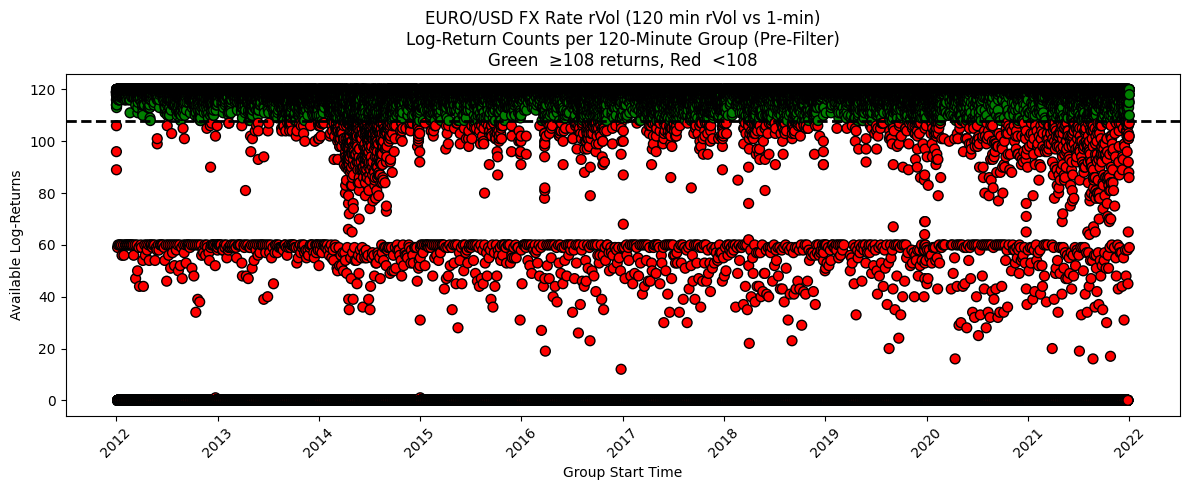

Keeping 29113 groups (the green ones) out of 43820 total.


C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\1444022814.py:160: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                              sum  count
group_id                                
2012-01-02 02:00:00  2.129705e-06    119
2012-01-02 04:00:00  3.407421e-06    119
2012-01-02 06:00:00  9.679048e-07    118
2012-01-02 08:00:00  1.311797e-06    116
2012-01-02 10:00:00  1.068829e-06    114
...                           ...    ...
2021-12-31 06:00:00  8.690913e-07    120
2021-12-31 08:00:00  2.526838e-06    120
2021-12-31 10:00:00  3.520241e-06    120
2021-12-31 12:00:00  3.048053e-07    118
2021-12-31 14:00:00  1.279594e-07    110

[29113 rows x 2 columns]


C:\Users\estifo\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\estifo\AppData\Local\Temp\ipykernel_23092\1444022814.py:375: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open_first'], inplace=True)


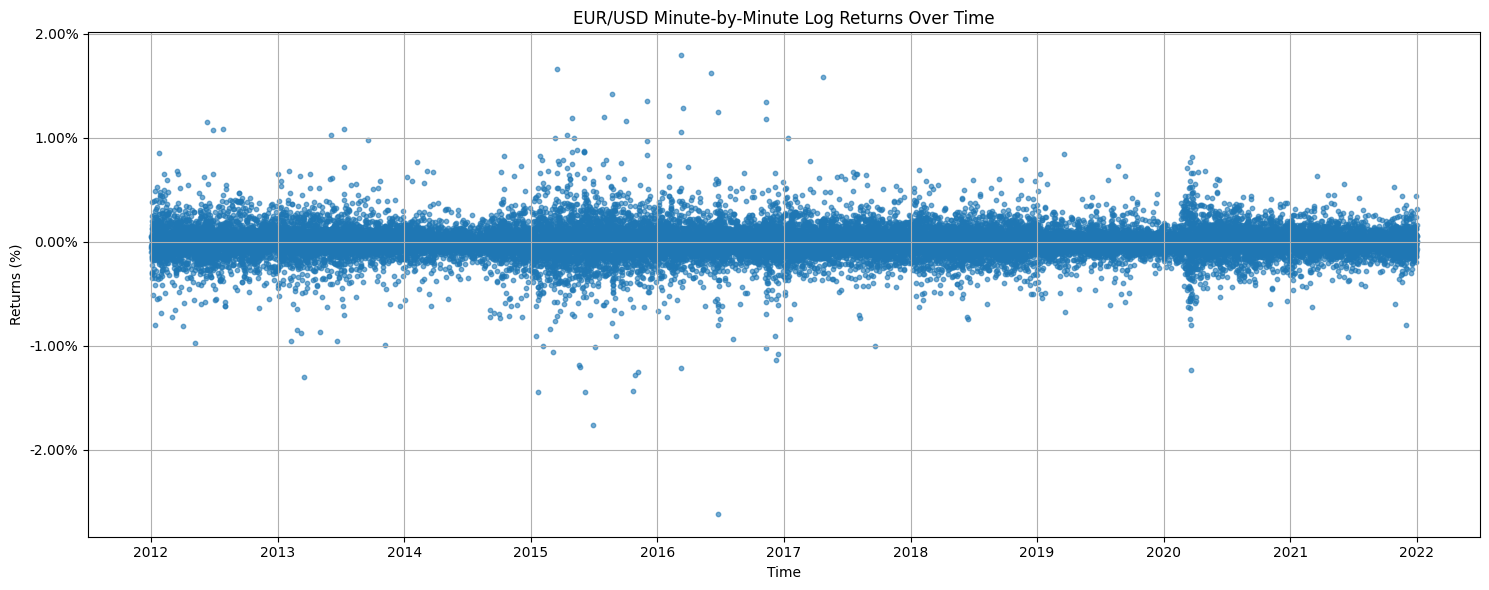

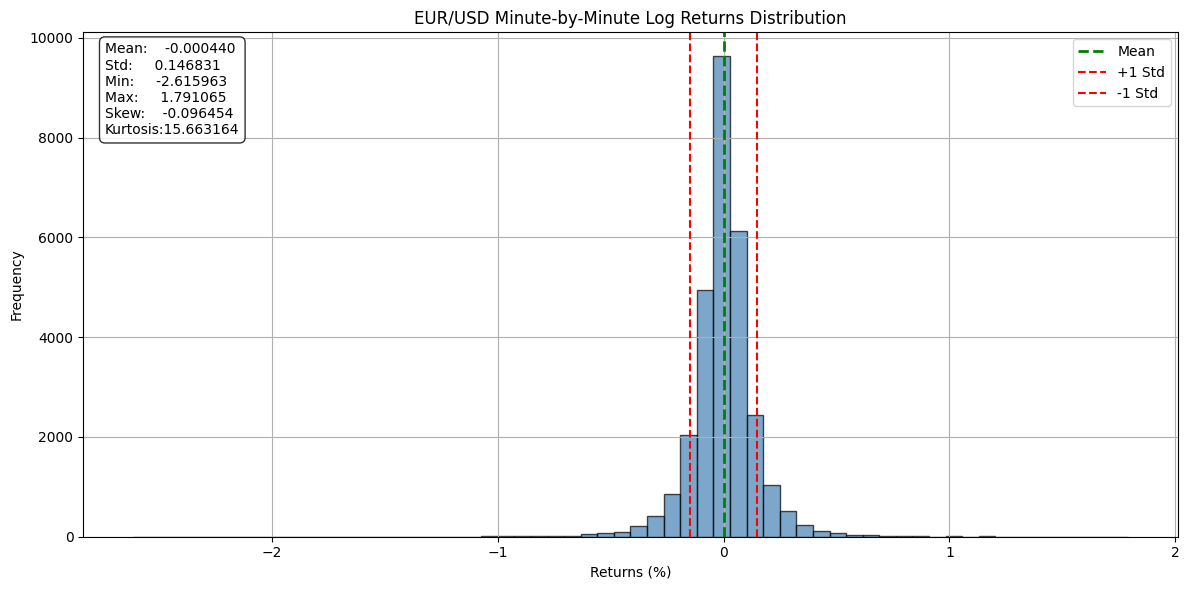

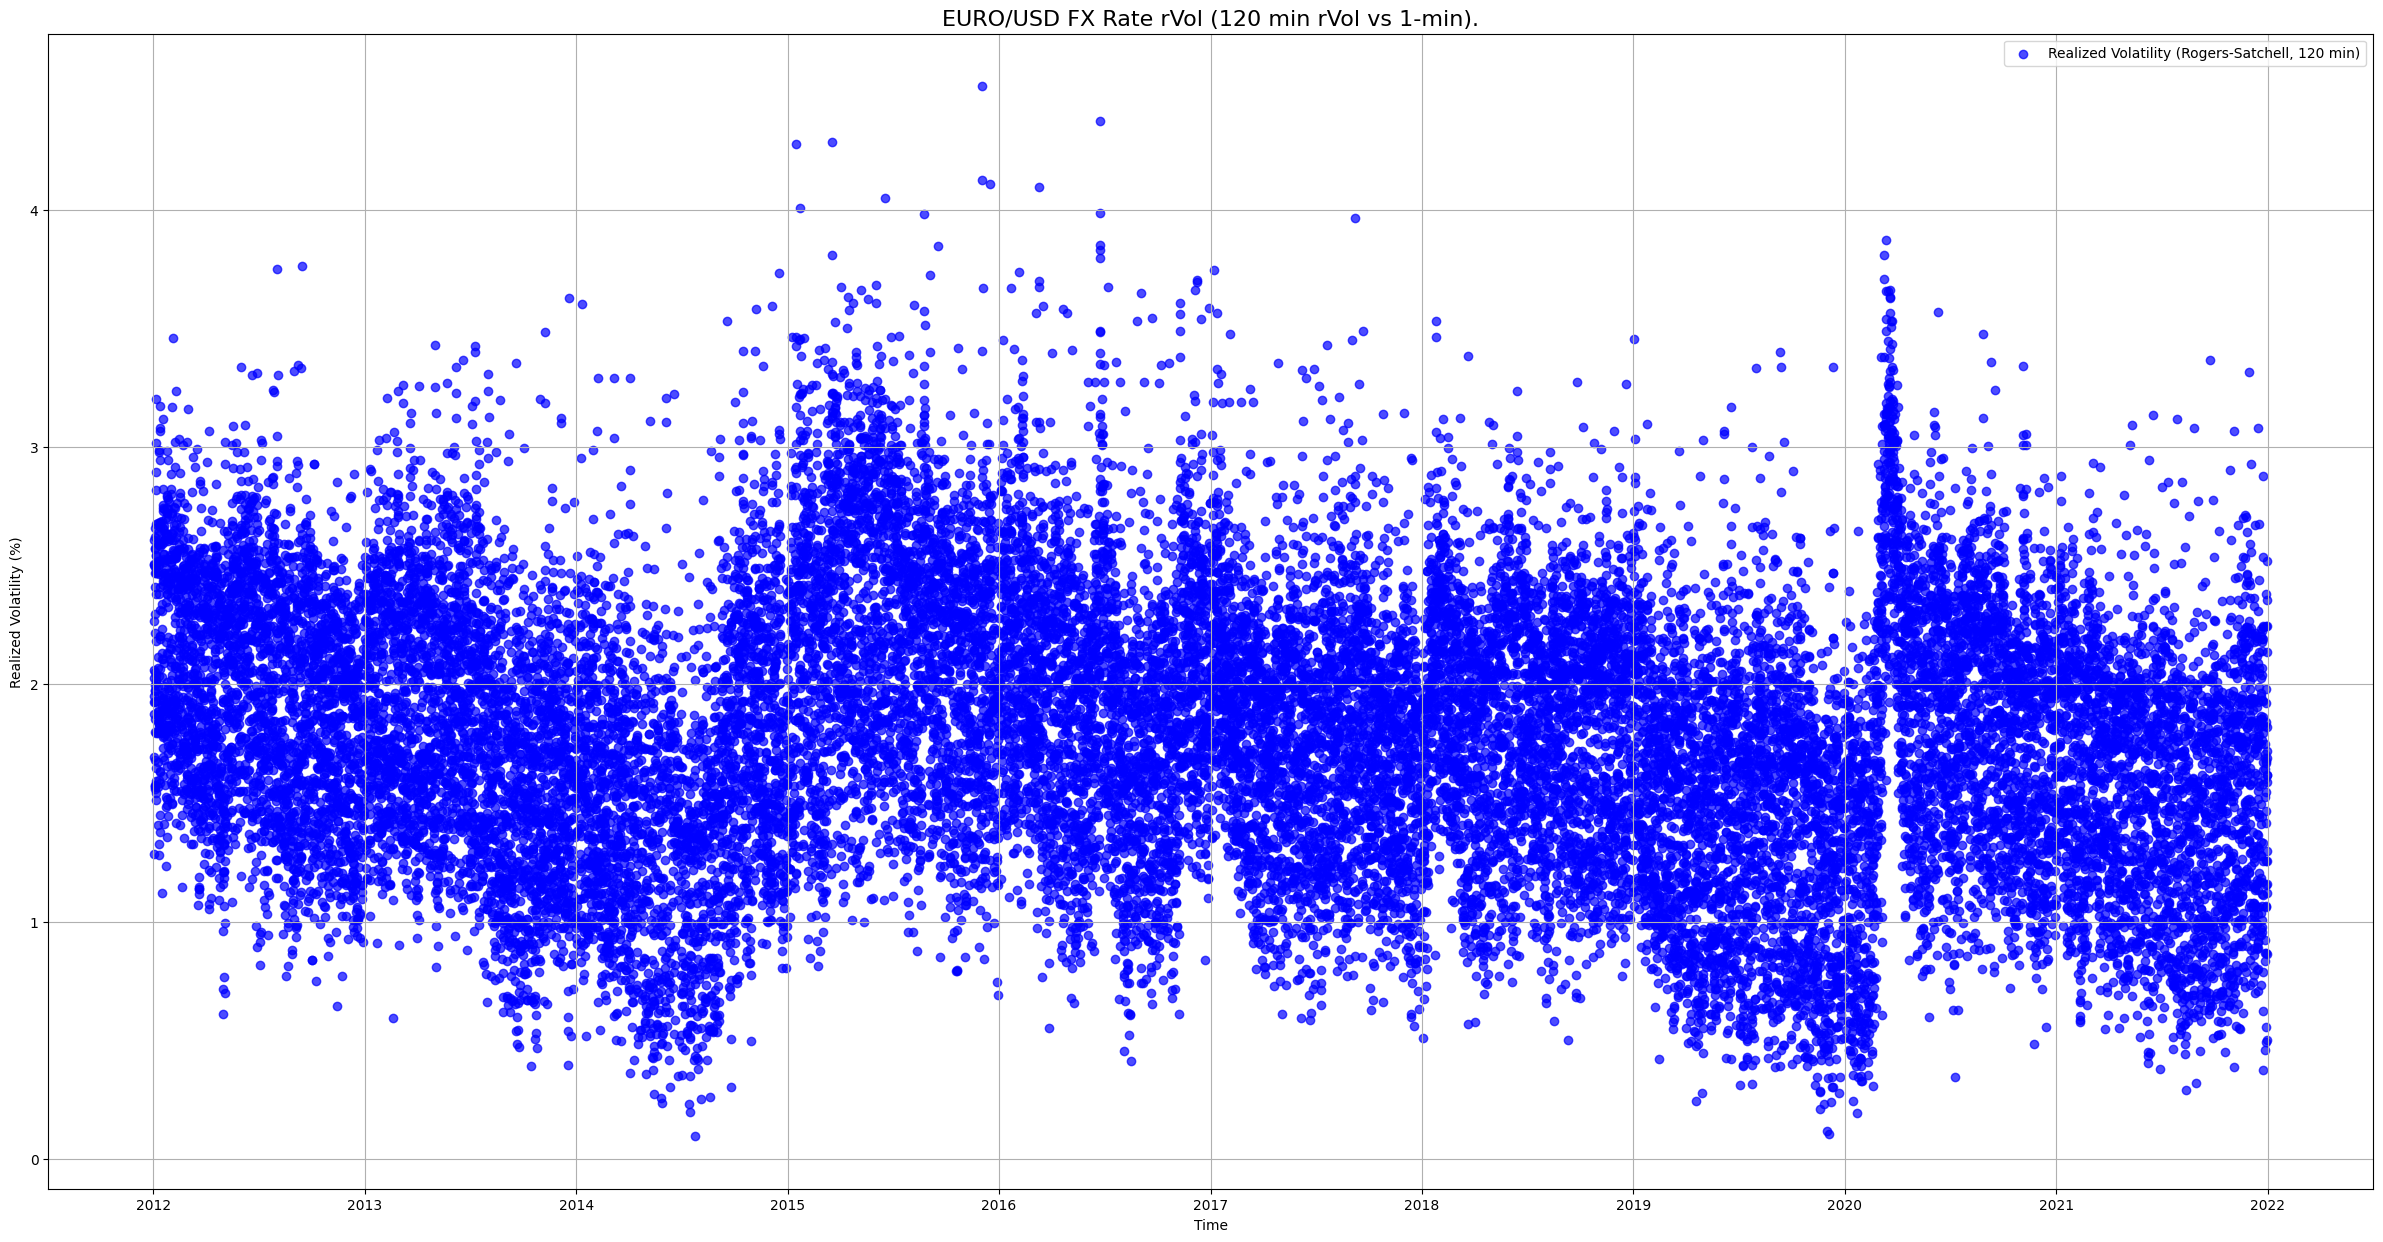

                 group_id       StartDateTime         EndDateTime  Open_first  \
0     2012-01-02 02:00:00 2012-01-02 02:00:00 2012-01-02 03:59:00     1.29324   
1     2012-01-02 04:00:00 2012-01-02 04:00:00 2012-01-02 05:59:00     1.29384   
2     2012-01-02 06:00:00 2012-01-02 06:00:00 2012-01-02 07:59:00     1.29454   
3     2012-01-02 08:00:00 2012-01-02 08:00:00 2012-01-02 09:59:00     1.29382   
4     2012-01-02 10:00:00 2012-01-02 10:00:00 2012-01-02 11:59:00     1.29325   
...                   ...                 ...                 ...         ...   
29108 2021-12-31 06:00:00 2021-12-31 06:00:00 2021-12-31 07:59:00     1.13248   
29109 2021-12-31 08:00:00 2021-12-31 08:00:00 2021-12-31 09:59:00     1.13253   
29110 2021-12-31 10:00:00 2021-12-31 10:00:00 2021-12-31 11:59:00     1.13438   
29111 2021-12-31 12:00:00 2021-12-31 12:00:00 2021-12-31 13:59:00     1.13790   
29112 2021-12-31 14:00:00 2021-12-31 14:00:00 2021-12-31 15:59:00     1.13848   

       High_max  Low_min  C

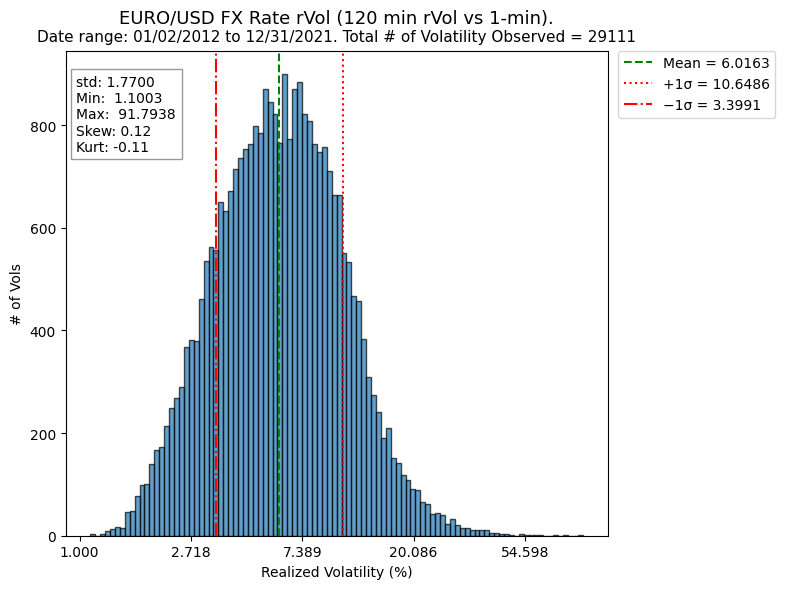

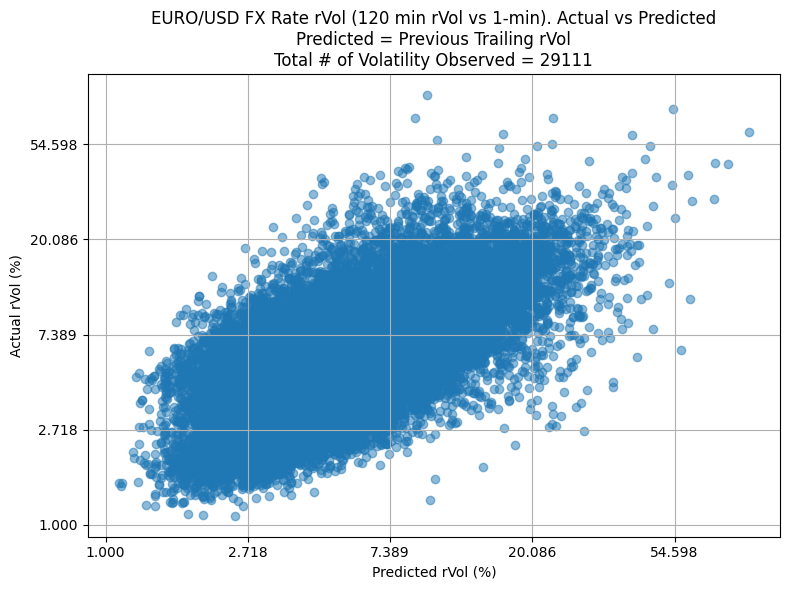

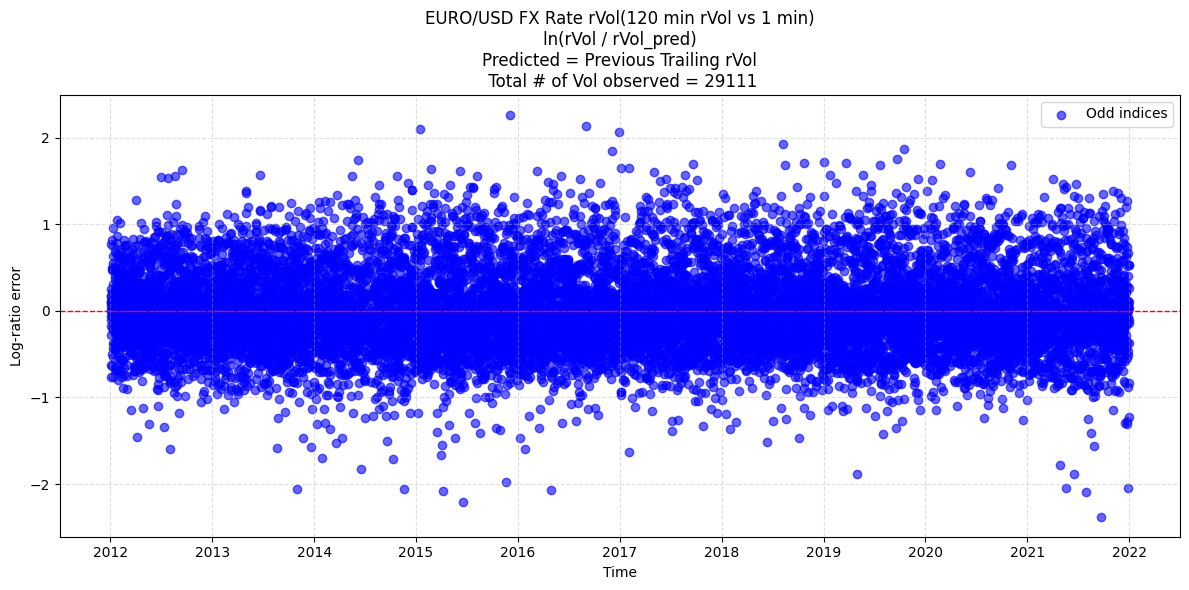

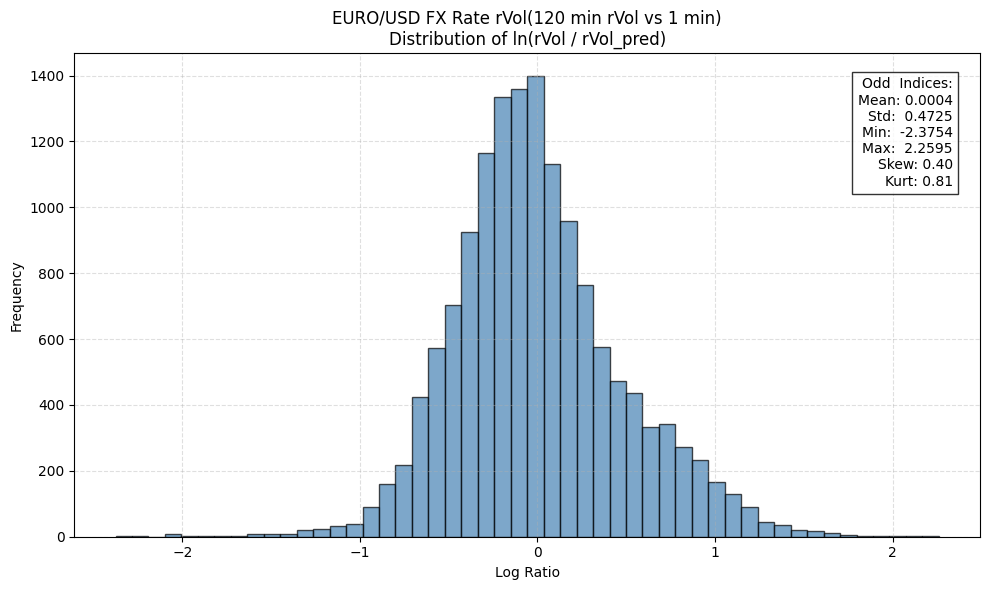

In [239]:
RS_120m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [207]:
RS_120m_rvol.head(20)

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,count,RVol_120min_Rogers-Satchell,Prev_Close_global,Log_Returns_global
EndDateTime,,,,,,,,,,,,
2012-01-02 03:59:00,2012-01-02 02:00:00,2012-01-02 02:00:00,1.29324,1.29531,1.29275,1.29383,0.0,1.0,119.0,9.658213,1.29324,0.000456
2012-01-02 05:59:00,2012-01-02 04:00:00,2012-01-02 04:00:00,1.29384,1.29709,1.29381,1.29457,0.0,1.0,119.0,12.216589,1.29383,0.000572
2012-01-02 07:59:00,2012-01-02 06:00:00,2012-01-02 06:00:00,1.29454,1.29514,1.29311,1.29381,0.0,2.0,118.0,6.511085,1.29457,-0.000587
2012-01-02 09:59:00,2012-01-02 08:00:00,2012-01-02 08:00:00,1.29382,1.29442,1.29227,1.29327,0.0,4.0,116.0,7.580019,1.29381,-0.000417
2012-01-02 11:59:00,2012-01-02 10:00:00,2012-01-02 10:00:00,1.29325,1.29413,1.29167,1.29197,0.0,6.0,114.0,6.842128,1.29327,-0.001006
2012-01-02 19:59:00,2012-01-02 18:00:00,2012-01-02 18:00:00,1.29338,1.29586,1.29316,1.29520,0.0,6.0,114.0,5.439281,1.29197,0.002497
2012-01-02 21:59:00,2012-01-02 20:00:00,2012-01-02 20:00:00,1.29519,1.29884,1.29509,1.29780,0.0,0.0,120.0,7.027627,1.29520,0.002005
2012-01-02 23:59:00,2012-01-02 22:00:00,2012-01-02 22:00:00,1.29777,1.29820,1.29713,1.29784,0.0,7.0,113.0,3.612786,1.29780,0.000031
2012-01-03 01:59:00,2012-01-03 00:00:00,2012-01-03 00:00:00,1.29785,1.29930,1.29733,1.29816,0.0,1.0,119.0,7.848707,1.29784,0.000247


In [208]:
RS_120m_rvol.describe()

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,count,RVol_120min_Rogers-Satchell,Prev_Close_global,Log_Returns_global
count,29113,29113,29113.000000,29113.000000,29113.000000,29113.000000,29113.0,29113.000000,29113.000000,29112.000000,29113.000000,29113.000000
mean,2016-12-21 15:10:06.533163776,2016-12-21 15:10:06.533163776,1.189683,1.190845,1.188547,1.189680,0.0,1.232680,118.767286,7.107030,1.189685,-0.000004
min,2012-01-02 02:00:00,2012-01-02 02:00:00,1.035590,1.037900,1.034060,1.035600,0.0,0.000000,108.000000,1.100260,1.035600,-0.026160
25%,2014-06-27 10:00:00,2014-06-27 10:00:00,1.117730,1.118930,1.116670,1.117760,0.0,0.000000,119.000000,4.007049,1.117760,-0.000617
50%,2017-01-02 02:00:00,2017-01-02 02:00:00,1.168580,1.169630,1.167520,1.168560,0.0,0.000000,120.000000,6.032368,1.168570,0.000000
75%,2019-06-13 04:00:00,2019-06-13 04:00:00,1.261800,1.263040,1.260630,1.261730,0.0,1.000000,120.000000,8.940038,1.261760,0.000613
max,2021-12-31 14:00:00,2021-12-31 14:00:00,1.396210,1.399270,1.394770,1.396230,0.0,12.000000,120.000000,91.793796,1.396230,0.017911
std,NaN,NaN,0.091178,0.091189,0.091161,0.091175,0.0,2.476489,2.476479,4.620954,0.091176,0.001468


In [209]:

#RS_720m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 720, minute_interval = 5, threshold = 0.1, vol_title= 'RVol_720min_Rogers-Satchell')  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [210]:
#RS_720m_rvol.describe()

In [211]:
#rvol_2880m_cc = calculate_rvol(data, vol_measure='Close-to-Close', timeframe=2880, minute_interval= 1, threshold=0.1, vol_title= 'RVol_2880min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [212]:
#rvol_2880m_rs = calculate_rvol(data, vol_measure='Rogers-Satchell', timeframe=2880, minute_interval= 30, threshold=0.1, vol_title= 'RVol_2880min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [213]:
#rvol_2880m_rs['RVol_2880min_Rogers-Satchell'].describe()

In [214]:
RS_120m_rvol#.head(20)

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,count,RVol_120min_Rogers-Satchell,Prev_Close_global,Log_Returns_global
EndDateTime,,,,,,,,,,,,
2012-01-02 03:59:00,2012-01-02 02:00:00,2012-01-02 02:00:00,1.29324,1.29531,1.29275,1.29383,0.0,1.0,119.0,9.658213,1.29324,0.000456
2012-01-02 05:59:00,2012-01-02 04:00:00,2012-01-02 04:00:00,1.29384,1.29709,1.29381,1.29457,0.0,1.0,119.0,12.216589,1.29383,0.000572
2012-01-02 07:59:00,2012-01-02 06:00:00,2012-01-02 06:00:00,1.29454,1.29514,1.29311,1.29381,0.0,2.0,118.0,6.511085,1.29457,-0.000587
2012-01-02 09:59:00,2012-01-02 08:00:00,2012-01-02 08:00:00,1.29382,1.29442,1.29227,1.29327,0.0,4.0,116.0,7.580019,1.29381,-0.000417
2012-01-02 11:59:00,2012-01-02 10:00:00,2012-01-02 10:00:00,1.29325,1.29413,1.29167,1.29197,0.0,6.0,114.0,6.842128,1.29327,-0.001006
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 07:59:00,2021-12-31 06:00:00,2021-12-31 06:00:00,1.13248,1.13349,1.13120,1.13252,0.0,0.0,120.0,6.169781,1.13248,0.000035
2021-12-31 09:59:00,2021-12-31 08:00:00,2021-12-31 08:00:00,1.13253,1.13534,1.13191,1.13437,0.0,0.0,120.0,10.520242,1.13252,0.001632
2021-12-31 11:59:00,2021-12-31 10:00:00,2021-12-31 10:00:00,1.13438,1.13796,1.13379,1.13790,0.0,0.0,120.0,12.417189,1.13437,0.003107


In [215]:
#RS_120m_rvol.to_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol_RV_Rogers-Satchell.csv", index=False)

In [216]:
df

,time,ms,time.1,ms.1,bid,ask,mid,minute,group_id
0,2025-02-19 08:00:00,0.000,2/19/25 8:00 AM,0.000,609.603988,609.637854,609.620921,2025-02-19 08:00:00,0.0
1,2025-02-19 08:00:00,0.333,2/19/25 8:00 AM,0.333,609.609069,609.642935,609.626002,2025-02-19 08:00:00,0.0
2,2025-02-19 08:00:00,0.667,2/19/25 8:00 AM,0.667,609.609857,609.643724,609.626790,2025-02-19 08:00:00,0.0
3,2025-02-19 08:00:00,0.000,2/19/25 8:00 AM,0.000,609.611744,609.645610,609.628677,2025-02-19 08:00:00,0.0
4,2025-02-19 08:00:00,0.333,2/19/25 8:00 AM,0.333,609.606529,609.640396,609.623462,2025-02-19 08:00:00,0.0
...,...,...,...,...,...,...,...,...,...
864028,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
864029,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
864030,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
864031,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [241]:
def generate_28_day_stability_groups(df, vol_col, stability_days):
    df = df.copy()
    df.sort_index(inplace=True)

    # Step 1: Create rVol_p and log-ratio columns
    df['rVol_p'] = df[vol_col].shift(1)
    df['log_ratio'] = np.log(df[vol_col] / df['rVol_p'])
    df.dropna(inplace=True)
    
    # Splitting into even and odd indices
    even_data = df.iloc[::2]
    odd_data = df.iloc[1::2]
    df = odd_data.copy()

    

    # Step 2: Create Stability Group ID
    start_time = df.index.min().floor('D')
    df['Stability_group_id'] = ((df.index - start_time) // pd.Timedelta(days=stability_days)) * pd.Timedelta(days=stability_days) + start_time

    # Reset index
    df.reset_index(inplace=True)

    # Step 3: Aggregate all required fields
    grouped = df.groupby("Stability_group_id")

    result = grouped.agg(
        StartDateTime=('StartDateTime', 'first'),
        EndDateTime=('EndDateTime', 'last'),
        Open_first=('Open_first', 'first'),
        High_max=('High_max', 'max'),
        Low_min=('Low_min', 'min'),
        Close_last=('Close_last', 'last'),
        Volume_sum=('Volume_sum', 'sum'),
        indicator_sum=('indicator_sum', 'sum'),
        count=('count', 'sum'),
        Vol_mean=(vol_col, 'mean'),
        Vol_std=(vol_col, 'std'),
        Vol_skew=(vol_col, lambda x: skew(x, bias=False) if len(x) > 1 else np.nan),
        Vol_kurtosis=(vol_col, lambda x: kurtosis(x, bias=False) if len(x) > 1 else np.nan),
        #Vol_present=(vol_col, lambda x: x.notna().sum()),
        Log_ratio_Count=('log_ratio', lambda x: x.notna().sum()),
        Log_ratio_Mean= ('log_ratio', 'mean'),#('log_ratio', lambda x: np.mean(np.abs(x))),#('log_ratio', 'mean'), 
        Log_ratio_Std=('log_ratio', 'std'),#('log_ratio', lambda x: np.std(np.abs(x))),#('log_ratio', 'std'),
        Log_ratio_Skew=('log_ratio', lambda x: skew(x, bias=False) if len(x) > 1 else np.nan),
        Log_ratio_Kurtosis=('log_ratio', lambda x: kurtosis(x, bias=False) if len(x) > 1 else np.nan)
    )

    # Step 4: Add group end date
    result['Stability_group_end'] = result.index + pd.Timedelta(days=stability_days) - pd.Timedelta(seconds=1)

    return result


In [242]:
# Generate the 14-day grouped dataset
grouped_28_day_df = generate_28_day_stability_groups(RS_120m_rvol, vol_col='RVol_120min_Rogers-Satchell', stability_days=28)

In [219]:
#grouped_14_day_df.to_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol_RV_Rogers-Satchell_14DayGroups.csv")

In [243]:
grouped_28_day_df

,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,count,Vol_mean,Vol_std,Vol_skew,Vol_kurtosis,Log_ratio_Count,Log_ratio_Mean,Log_ratio_Std,Log_ratio_Skew,Log_ratio_Kurtosis,Stability_group_end
Stability_group_id,,,,,,,,,,,,,,,,,,,
2012-01-02,2012-01-02 06:00:00,2012-01-29 21:59:00,1.29454,1.32185,1.26253,1.31861,0.0,52.0,13748.0,9.644713,4.410768,0.994019,0.762700,115,-0.006399,0.395542,0.391882,0.011291,2012-01-29 23:59:59
2012-01-30,2012-01-30 00:00:00,2012-02-26 21:59:00,1.31767,1.34749,1.29763,1.34496,0.0,32.0,14128.0,9.695578,4.276909,1.687858,5.647608,118,0.012017,0.385084,0.111605,-0.315619,2012-02-26 23:59:59
2012-02-27,2012-02-27 00:00:00,2012-03-25 21:59:00,1.34489,1.34848,1.30033,1.32647,0.0,32.0,14128.0,8.060270,3.321531,1.126778,1.788753,118,-0.006867,0.354931,-0.084482,0.368544,2012-03-25 23:59:59
2012-03-26,2012-03-26 00:00:00,2012-04-22 21:59:00,1.32650,1.33846,1.29940,1.31870,0.0,71.0,14089.0,7.852984,3.369249,0.656898,-0.150842,118,-0.027163,0.412272,0.071948,1.027993,2012-04-22 23:59:59
2012-04-23,2012-04-23 00:00:00,2012-05-20 21:59:00,1.31915,1.32789,1.26415,1.28102,0.0,68.0,14092.0,7.641890,3.625205,1.014105,2.031646,118,-0.043951,0.404041,0.091671,0.447992,2012-05-20 23:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,2021-08-30 02:00:00,2021-09-26 21:59:00,1.17993,1.19090,1.16843,1.17239,0.0,115.0,11645.0,4.716188,3.334350,4.441637,29.332789,98,0.076136,0.528357,0.979522,1.166161,2021-09-26 23:59:59
2021-09-27,2021-09-27 00:00:00,2021-10-24 21:59:00,1.17221,1.17247,1.15242,1.16428,0.0,154.0,12086.0,4.546404,2.331415,1.180145,1.834535,102,-0.031982,0.446897,0.717483,1.038467,2021-10-24 23:59:59
2021-10-25,2021-10-25 00:00:00,2021-11-21 21:59:00,1.16637,1.16921,1.12524,1.12715,0.0,165.0,12915.0,5.224121,2.674637,0.944441,0.862964,109,0.001455,0.468571,0.618830,-0.095754,2021-11-21 23:59:59


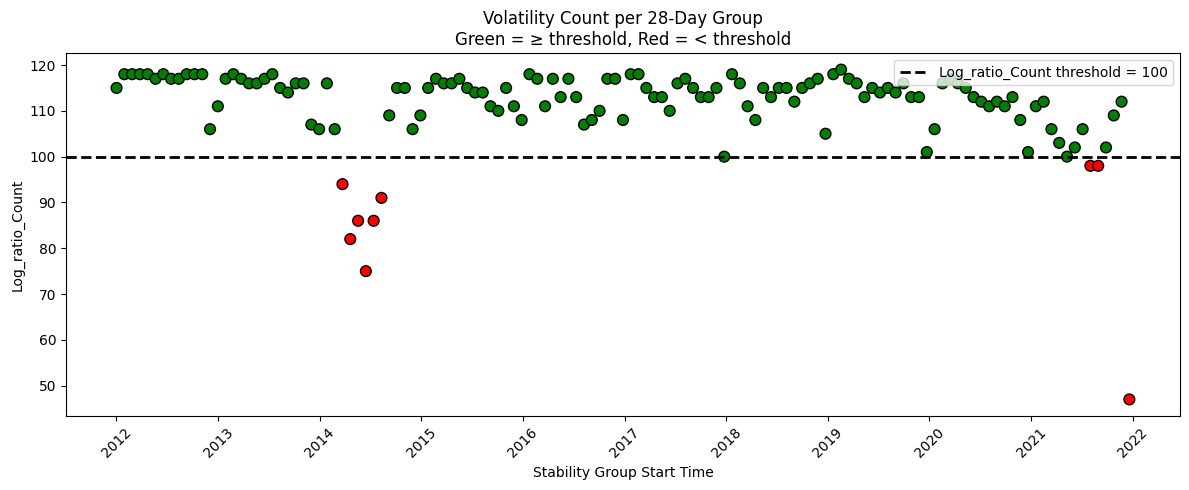

Stability_group_id
2012-01-02    115
2012-01-30    118
2012-02-27    118
2012-03-26    118
2012-04-23    118
             ... 
2021-08-30     98
2021-09-27    102
2021-10-25    109
2021-11-22    112
2021-12-20     47
Name: Log_ratio_Count, Length: 131, dtype: int64

In [244]:


def plot_vol_present_scatter(df_grouped, threshold):
    """
    Plot a scatter of Vol_present per stability group.
    Green = group has enough volatility points (≥ threshold)
    Red = group has too few (< threshold)
    """
    vol_present = df_grouped["Log_ratio_Count"]
    passed = vol_present >= threshold

    plt.figure(figsize=(12, 5))
    plt.scatter(
        vol_present.index, vol_present.values,
        c=['green' if ok else 'red' for ok in passed],
        edgecolor='k', s=60
    )
    plt.axhline(y=threshold, color='black', linestyle='--', linewidth=2,
                label=f"Log_ratio_Count threshold = {threshold}")
    plt.xticks(rotation=45)
    plt.xlabel('Stability Group Start Time')
    plt.ylabel('Log_ratio_Count')
    plt.title('Volatility Count per 28-Day Group\nGreen = ≥ threshold, Red = < threshold')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    return vol_present

plot_vol_present_scatter(grouped_28_day_df, threshold=100)

In [245]:
def plot_log_rvol_ratio_statistics_filtered(df_grouped, threshold):
    """
    Filter groups with sufficient log-rVol ratio counts and plot mean, std dev,
    skewness, and kurtosis of ln(rVol / rVol_p) for those groups only.
    """
    # Filter the DataFrame for groups meeting the threshold
    sufficient_data = df_grouped[df_grouped["Log_ratio_Count"] >= threshold]

    # Set up the subplots
    fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

    # Plotting each metric
    axs[0].scatter(sufficient_data.index, sufficient_data['Log_ratio_Mean'], color='blue', s=30)
    axs[0].set_ylabel('Mean')
    axs[0].set_title('Mean of ln(rVol / rVol_p)')
    axs[0].tick_params(labelbottom=True)

    axs[1].scatter(sufficient_data.index, sufficient_data['Log_ratio_Std'], color='orange', s=30)
    axs[1].set_ylabel('Std Dev')
    axs[1].set_title('Std Dev of ln(rVol / rVol_p)')
    axs[1].tick_params(labelbottom=True)

    axs[2].scatter(sufficient_data.index, sufficient_data['Log_ratio_Skew'], color='green', s=30)
    axs[2].set_ylabel('Skewness')
    axs[2].set_title('Skewness of ln(rVol / rVol_p)')
    axs[2].tick_params(labelbottom=True)

    axs[3].scatter(sufficient_data.index, sufficient_data['Log_ratio_Kurtosis'], color='red', s=30)
    axs[3].set_ylabel('Kurtosis')
    axs[3].set_xlabel('Stability Group Start Time')
    axs[3].set_title('Kurtosis of ln(rVol / rVol_p)')

    # Final layout
    plt.suptitle(f'Log-Volatility Ratio Statistics (Groups with ≥ {threshold} Log_ratio_Count)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
   

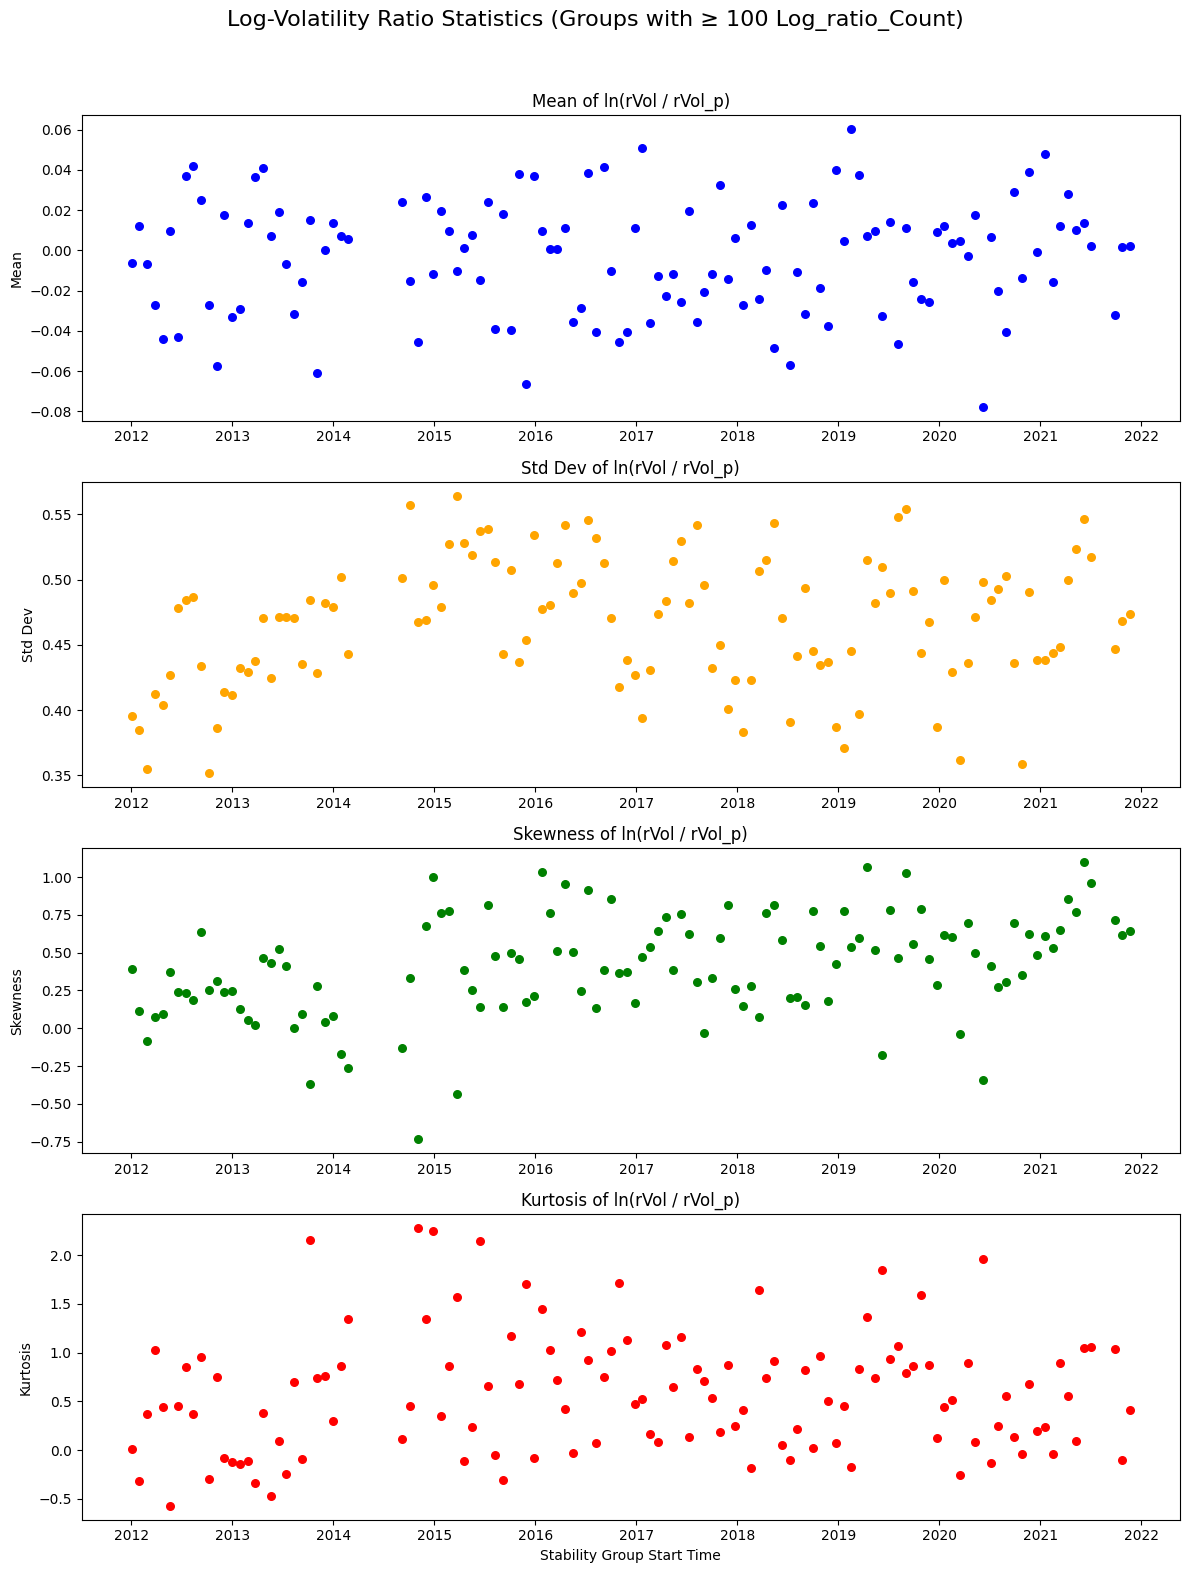

: 

In [ ]:
plot_log_rvol_ratio_statistics_filtered(grouped_28_day_df, threshold=100)

In [224]:
RS_120m_rvol['group_id'].describe()

count                            29113
mean     2016-12-21 15:10:06.533163776
min                2012-01-02 02:00:00
25%                2014-06-27 10:00:00
50%                2017-01-02 02:00:00
75%                2019-06-13 04:00:00
max                2021-12-31 14:00:00
Name: group_id, dtype: object

In [225]:
average_dist_pred_rvol(RS_120m_rvol)

NameError: name 'average_dist_pred_rvol' is not defined

In [ ]:
RS_720m_rvol.dropna(inplace=True)
RS_720m_rvol.head(20)

NameError: name 'RS_720m_rvol' is not defined

<Axes: xlabel='EndDateTime'>

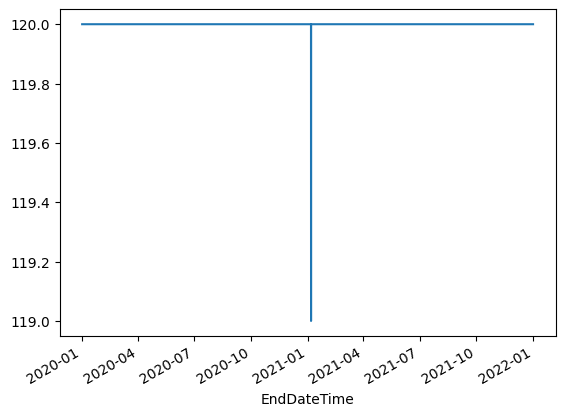

In [ ]:
p = RS_120m_rvol['count'] + RS_120m_rvol['indicator_sum']
p.plot()

In [ ]:
RS_720m_rvol['group_id'].describe()

count                              899
mean     2020-12-24 06:55:39.710789632
min                2020-01-02 00:00:00
25%                2020-06-25 06:00:00
50%                2020-12-18 00:00:00
75%                2021-06-22 06:00:00
max                2021-12-31 00:00:00
Name: group_id, dtype: object

In [ ]:
average_dist_pred_rvol(RS_720m_rvol)

Timedelta('0 days 19:28:59.866369710')

In [ ]:
rvol_2880m_rs

,group_id,StartDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,count,RVol_2880min_Rogers-Satchell
EndDateTime,,,,,,,,,,
2020-01-08 23:59:00,2020-01-07,2020-01-07,1.11908,1.11924,1.11016,1.11154,0.0,26.0,2854.0,5.433977
2020-01-14 23:59:00,2020-01-13,2020-01-13,1.11272,1.11469,1.11045,1.11331,0.0,55.0,2825.0,3.976879
2020-01-16 23:59:00,2020-01-15,2020-01-15,1.11330,1.11727,1.11185,1.11319,0.0,74.0,2806.0,3.963165
2020-01-22 23:59:00,2020-01-21,2020-01-21,1.10992,1.11179,1.10700,1.10852,0.0,72.0,2808.0,3.851782
2020-01-28 23:59:00,2020-01-27,2020-01-27,1.10276,1.10375,1.09978,1.10131,0.0,92.0,2788.0,3.544200
...,...,...,...,...,...,...,...,...,...,...
2021-12-14 23:59:00,2021-12-13,2021-12-13,1.12943,1.13238,1.12535,1.12639,0.0,97.0,2783.0,4.999945
2021-12-16 23:59:00,2021-12-15,2021-12-15,1.12637,1.13603,1.12215,1.13354,0.0,48.0,2832.0,7.686492
2021-12-22 23:59:00,2021-12-21,2021-12-21,1.12804,1.13423,1.12607,1.13392,0.0,97.0,2783.0,5.838547


In [ ]:
rvol_2880m_rs['n_minus_1_mean']+rvol_2880m_rs['indicator_sum']

KeyError: 'n_minus_1_mean'

In [ ]:
average_dist_pred_rvol(rvol_2880m_rs)

Timedelta('4 days 17:27:16.363636363')